### **Import Data/ Packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
spotify1 = pd.read_csv('/content/drive/MyDrive/DSO528 Final Project/Data/DSO528_project_spotify_1.csv')
spotify2 = pd.read_csv('/content/drive/MyDrive/DSO528 Final Project/Data/DSO528_project_spotify_2.csv')

In [ ]:
spotify1.head()

,track_id,track_name,track_artist,popular,release_year,release_month,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,697MjF1454XKvZmTuqkWmD,I Miss You,Jeriqo,0,2019,2,edm,0.520,0.789,0,-7.717,1,0.0432,0.004910,0.000013,0.0816,0.415,174.026,216347
1,3x2bXiU0o4WbsPkawXlfDA,Who Are You,The Who,0,1978,8,rock,0.651,0.661,9,-11.405,1,0.0511,0.265000,0.003130,0.1060,0.489,156.371,378707
2,0jEaPBjFAWjQTMVouRwaHi,Happy,The Beef Seeds,0,2015,1,r&b,0.640,0.758,10,-5.204,1,0.1600,0.665000,0.000000,0.1270,0.932,86.529,218044
3,5EKUb1FKsyYVaSXb41YBIj,ONE,Rev Theory,0,2020,1,rock,0.398,0.966,4,-2.352,0,0.0453,0.000006,0.000000,0.3030,0.520,90.016,208196
4,300DUx4tdtCdGEUXR032jA,Palace/Curse,The Internet,0,2015,6,r&b,0.447,0.625,10,-8.212,0,0.3230,0.035100,0.000727,0.2430,0.261,67.104,440013


In [ ]:
spotify2.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,tempo,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04
1,LALA,Myke Towers,1,2023,3,23,133716286,92,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06


### **Check the datasets**

#### **Columns**
What are the differences between two datasets?

In [ ]:
spotify1.shape

(26266, 19)

In [ ]:
spotify2.shape

(953, 17)

In [ ]:
spotify1.columns

Index(['track_id', 'track_name', 'track_artist', 'popular', 'release_year',
       'release_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [ ]:
spotify2.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'streams', 'tempo', 'key', 'mode',
       'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness'],
      dtype='object')

In [ ]:
# prompt: check if the columns' name in spotify1 and spotify2 are matching

# Find the columns that are present in both DataFrames
common_columns = set(spotify1.columns) & set(spotify2.columns)

# Find the columns that are only present in spotify1
spotify1_only_columns = set(spotify1.columns) - set(spotify2.columns)

# Find the columns that are only present in spotify2
spotify2_only_columns = set(spotify2.columns) - set(spotify1.columns)

# Print the results
print("Common columns:", common_columns)
print("Columns only in spotify1:", spotify1_only_columns)
print("Columns only in spotify2:", spotify2_only_columns)

# Check if the column names are exactly matching
if set(spotify1.columns) == set(spotify2.columns):
  print("The columns' names in spotify1 and spotify2 are matching.")
else:
  print("The columns' names in spotify1 and spotify2 are not matching.")

Common columns: {'mode', 'track_name', 'acousticness', 'tempo', 'valence', 'danceability', 'speechiness', 'energy', 'key', 'instrumentalness', 'liveness'}
Columns only in spotify1: {'track_id', 'release_month', 'release_year', 'loudness', 'duration_ms', 'track_artist', 'playlist_genre', 'popular'}
Columns only in spotify2: {'released_year', 'streams', 'released_day', 'artist_count', 'artist(s)_name', 'released_month'}
The columns' names in spotify1 and spotify2 are not matching.


#### **Missing Values**
Check if there are any missing data in the datasets

In [ ]:
spotify1.isnull().sum()[spotify1.isnull().sum() != 0]

,0
track_name,3
track_artist,3


In [ ]:
spotify2.isnull().sum()[spotify2.isnull().sum() != 0]

,0
key,95


In [ ]:
# prompt: find the rows that has null values

spotify1[spotify1.isnull().any(axis=1)]

,track_id,track_name,track_artist,popular,release_year,release_month,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
4195,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,2012,1,latin,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.103,0.726,97.017,252773
4888,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,2012,1,rap,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.116,0.649,95.999,282707
14917,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,2017,12,rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.553,0.191,146.153,202235


In [ ]:
spotify2[spotify2.isnull().any(axis=1)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,tempo,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
12,Flowers,Miley Cyrus,1,2023,1,12,1316855716,118,NaN,Major,0.71,0.65,0.68,0.06,0.00,0.03,0.07
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,30546883,78,NaN,Major,0.44,0.14,0.09,0.96,0.00,0.10,0.03
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,1297026226,135,NaN,Minor,0.48,0.44,0.42,0.12,0.02,0.11,0.03
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,123122413,120,NaN,Major,0.81,0.63,0.68,0.11,0.00,0.11,0.04
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,65156199,144,NaN,Major,0.77,0.75,0.58,0.52,0.00,0.23,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Hold Me Closer,"Elton John, Britney Spears",2,2017,11,10,284216603,126,NaN,Major,0.67,0.49,0.77,0.11,0.00,0.19,0.11
901,After LIKE,IVE,1,2022,8,22,265548837,125,NaN,Major,0.68,0.80,0.92,0.10,0.00,0.09,0.12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,244585109,137,NaN,Major,0.74,0.71,0.89,0.24,0.61,0.15,0.05
938,Labyrinth,Taylor Swift,1,2022,10,21,187339835,110,NaN,Major,0.48,0.15,0.31,0.80,0.22,0.12,0.04


#### **Duplicates**
check if there are duplicates in the datasets.

In [ ]:
# prompt: find the duplicates in track_name

# Find duplicates in track_name within spotify1 DataFrame
duplicates_spotify1 = spotify1[spotify1.duplicated(subset=['track_name'], keep=False)]

# Print the duplicate track names within spotify1
if not duplicates_spotify1.empty:
  print("Duplicate track names found in spotify1:")
  print(duplicates_spotify1['track_name'].unique())
else:
  print("No duplicate track names found in spotify1.")

# Find duplicates in track_name within spotify2 DataFrame
duplicates_spotify2 = spotify2[spotify2.duplicated(subset=['track_name'], keep=False)]

# Print the duplicate track names within spotify2
if not duplicates_spotify2.empty:
  print("Duplicate track names found in spotify2:")
  print(duplicates_spotify2['track_name'].unique())
else:
  print("No duplicate track names found in spotify2.")


Duplicate track names found in spotify1:
['I Miss You' 'Who Are You' 'Happy' ...
 "Nothin' But A Good Time - Remastered 2006" 'Take Me Back'
 'About Last Night']
Duplicate track names found in spotify2:
['Flowers' 'Daylight' 'Die For You' 'SNAP' 'Numb' 'Miss You'
 'SPIT IN MY FACE!' 'About Damn Time'
 'Let It Snow! Let It Snow! Let It Snow!' 'Take My Breath']


In [ ]:
spotify1[['track_id', 'track_name']].nunique()

,0
track_id,23184
track_name,19547


### **Data Preprocessing**

Current issues:
1. Songs appear in Spotify2 dataset don't exist in Spotify1 dataset (<2020)
2. Duplicates (same song names different track_id/ same track_id different genre)
3. the key columns is not in the same format in the two dataset (numerical vs string)
4. Data Entry Error: some of the songs in Spotify1 are labelled as released in 1905 or #value!
5. null values in track_name (Spotify1) and Key (Spotify2)
6. Spotify2 is missing some of the columns in Spotify1 and has different column names

#### Null Values

In [ ]:
# # prompt: remove null data in music_data_pre2020
# print(spotify1.shape)

# # Remove rows with null values in music_data_pre2020
# cleaned_spotify1 = spotify1.dropna()

# print(cleaned_spotify1.shape)

We are not changing any of the null values for now, as most of them will still be very useful in our later analysis. Imputation could be another way to address the issue of null values.

#### Standardize Key columns

In [ ]:
spotify2['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [ ]:
spotify1['key'].unique()

array([ 0,  9, 10,  4,  1,  6,  7,  2,  3,  5,  8, 11])

In [ ]:
# Define the mapping of numbers to musical key names
key_mapping = {
    0: "C", 1: "C♯/D♭", 2: "D", 3: "D♯/E♭", 4: "E", 5: "F",
    6: "F♯/G♭", 7: "G", 8: "G♯/A♭", 9: "A", 10: "A♯/B♭", 11: "B"
}

# Convert the 'key' column using the mapping
spotify1['key'] = spotify1['key'].map(key_mapping)

# Display the unique "key" after the convert
spotify1['key'].unique()

array(['C', 'A', 'A♯/B♭', 'E', 'C♯/D♭', 'F♯/G♭', 'G', 'D', 'D♯/E♭', 'F',
       'G♯/A♭', 'B'], dtype=object)

In [ ]:
# Mapping to convert spotify2 key format to the spotify1 key format
spotify2_key_mapping = {
    'C': 'C', 'C#': 'C♯/D♭', 'D': 'D', 'D#': 'D♯/E♭', 'E': 'E', 'F': 'F',
    'F#': 'F♯/G♭', 'G': 'G', 'G#': 'G♯/A♭', 'A': 'A', 'A#': 'A♯/B♭', 'B': 'B'
}

# Apply the mapping to the 'key' column in spotify2
# This will leave NaN values unchanged
spotify2['key'] = spotify2['key'].map(spotify2_key_mapping)

# Display the first few rows to verify
spotify2['key'].unique()

array(['B', 'C♯/D♭', 'F', 'A', 'D', 'F♯/G♭', nan, 'G♯/A♭', 'G', 'E',
       'A♯/B♭', 'D♯/E♭'], dtype=object)

In [ ]:
# prompt: what is the data type of key columns in spotify1 and spotify2

# Display the data type of the 'key' column in spotify1
print("Data type of 'key' in spotify1:", spotify1['key'].dtype)

# Display the data type of the 'key' column in spotify2
print("Data type of 'key' in spotify2:", spotify2['key'].dtype)

Data type of 'key' in spotify1: object
Data type of 'key' in spotify2: object


#### Match the column names in Spotify2 to Spotify1 dataset and add "popular" column to spotify2.

In [ ]:
spotify1.columns

Index(['track_id', 'track_name', 'track_artist', 'popular', 'release_year',
       'release_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [ ]:
spotify2.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'streams', 'tempo', 'key', 'mode',
       'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness'],
      dtype='object')

In [ ]:
spotify1[['released_day']] = 1
spotify1[['streams', 'artist_count']] = np.nan
spotify1.head()

,track_id,track_name,track_artist,popular,release_year,release_month,playlist_genre,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count
0,697MjF1454XKvZmTuqkWmD,I Miss You,Jeriqo,0,2019,2,edm,0.520,0.789,C,...,0.0432,0.004910,0.000013,0.0816,0.415,174.026,216347,1,NaN,NaN
1,3x2bXiU0o4WbsPkawXlfDA,Who Are You,The Who,0,1978,8,rock,0.651,0.661,A,...,0.0511,0.265000,0.003130,0.1060,0.489,156.371,378707,1,NaN,NaN
2,0jEaPBjFAWjQTMVouRwaHi,Happy,The Beef Seeds,0,2015,1,r&b,0.640,0.758,A♯/B♭,...,0.1600,0.665000,0.000000,0.1270,0.932,86.529,218044,1,NaN,NaN
3,5EKUb1FKsyYVaSXb41YBIj,ONE,Rev Theory,0,2020,1,rock,0.398,0.966,E,...,0.0453,0.000006,0.000000,0.3030,0.520,90.016,208196,1,NaN,NaN
4,300DUx4tdtCdGEUXR032jA,Palace/Curse,The Internet,0,2015,6,r&b,0.447,0.625,A♯/B♭,...,0.3230,0.035100,0.000727,0.2430,0.261,67.104,440013,1,NaN,NaN


In [ ]:
spotify2['popular'] = 1
spotify2[['loudness', 'playlist_genre', 'track_id', 'duration_ms']] = np.nan
spotify2.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,tempo,key,mode,...,energy,acousticness,instrumentalness,liveness,speechiness,popular,loudness,playlist_genre,track_id,duration_ms
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,B,Major,...,0.83,0.31,0.00,0.08,0.04,1,NaN,NaN,NaN,NaN
1,LALA,Myke Towers,1,2023,3,23,133716286,92,C♯/D♭,Major,...,0.74,0.07,0.00,0.10,0.04,1,NaN,NaN,NaN,NaN
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,F,Major,...,0.53,0.17,0.00,0.31,0.06,1,NaN,NaN,NaN,NaN
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,A,Major,...,0.72,0.11,0.00,0.11,0.15,1,NaN,NaN,NaN,NaN
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,A,Minor,...,0.80,0.14,0.63,0.11,0.06,1,NaN,NaN,NaN,NaN


In [ ]:
spotify1.rename(columns={
    'track_artist': 'artist(s)_name',
    'release_month': 'released_month',
    'release_year': 'released_year'
}, inplace=True)

In [ ]:
# prompt: check if the columns' name in spotify1 and spotify2 are matching

# Find the columns that are present in both DataFrames
common_columns = set(spotify1.columns) & set(spotify2.columns)

# Find the columns that are only present in spotify1
spotify1_only_columns = set(spotify1.columns) - set(spotify2.columns)

# Find the columns that are only present in spotify2
spotify2_only_columns = set(spotify2.columns) - set(spotify1.columns)

# Print the results
print("Common columns:", common_columns)
print("Columns only in spotify1:", spotify1_only_columns)
print("Columns only in spotify2:", spotify2_only_columns)

# Check if the column names are exactly matching
if set(spotify1.columns) == set(spotify2.columns):
  print("The columns' names in spotify1 and spotify2 are matching.")
else:
  print("The columns' names in spotify1 and spotify2 are not matching.")

Common columns: {'mode', 'instrumentalness', 'playlist_genre', 'liveness', 'track_id', 'streams', 'valence', 'danceability', 'speechiness', 'energy', 'key', 'popular', 'tempo', 'acousticness', 'released_year', 'loudness', 'duration_ms', 'artist_count', 'artist(s)_name', 'released_month', 'track_name', 'released_day'}
Columns only in spotify1: set()
Columns only in spotify2: set()
The columns' names in spotify1 and spotify2 are matching.


#### Songs appear in Spotify2 dataset don't exist in Spotify1 dataset (<2020)

When we are looking into the spotify2 dataset, we found that it contains songs that are released before covid (march 2020) and we think it shouldn't be included for the purpose of our analysis. Rather than removing the data directly, we prefer to move those data to Spotify1.

In [ ]:
# # prompt: check if any track_name is in Spotify2 that are released in and before Jan 2020 and in Spotify1, show the count of the list

# # Filter Spotify2 for tracks released in or before January 2020
# spotify2_before_2020 = spotify2[spotify2['released_date'] <= pd.to_datetime('2020-01-31')]

# # Get the track names from Spotify2 released before 2020
# track_names_spotify2_before_2020 = spotify2_before_2020['track_name'].tolist()

# # Find the intersection of track names in Spotify1 and Spotify2 (released before 2020)
# common_track_names = set(spotify1['track_name'].tolist()) & set(track_names_spotify2_before_2020)

# # Count the number of common track names
# count_common_track_names = len(common_track_names)

# print(f"The count of track names in Spotify2 released in or before January 2020 that are also in Spotify1 is: {count_common_track_names}")

In [ ]:
spotify1.shape

(26266, 22)

In [ ]:
spotify2.shape

(953, 22)

In [ ]:
# prompt: combine released_year, released_month, released_day columns into one timedate

# Convert 'released_year', 'released_month', 'released_day' to datetime objects
spotify1['released_date'] = pd.to_datetime(spotify1[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Print the first few rows to check
print(spotify1[['released_year', 'released_month', 'released_day', 'released_date']].head())

  released_year released_month  released_day released_date
0          2019              2             1    2019-02-01
1          1978              8             1    1978-08-01
2          2015              1             1    2015-01-01
3          2020              1             1    2020-01-01
4          2015              6             1    2015-06-01


In [ ]:
spotify2['released_date'] = pd.to_datetime(spotify2[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Print the first few rows to check
print(spotify2[['released_year', 'released_month', 'released_day', 'released_date']].head())

   released_year  released_month  released_day released_date
0           2023               7            14    2023-07-14
1           2023               3            23    2023-03-23
2           2023               6            30    2023-06-30
3           2019               8            23    2019-08-23
4           2023               5            18    2023-05-18


In [ ]:
if set(spotify1.columns) == set(spotify2.columns):
    print("Column names are the same (ignoring order).")
else:
    print("Column names are different.")
    print("Columns in spotify1 but not in spotify2:",
          set(spotify1.columns) - set(spotify2.columns))
    print("Columns in spotify2 but not in spotify1:",
          set(spotify2.columns) - set(spotify1.columns))

Column names are the same (ignoring order).


In [ ]:
# Find common columns
common_columns = sorted(set(spotify1.columns) & set(spotify2.columns))

# Check if dtypes match for common columns
dtypes_match = spotify1[common_columns].dtypes == spotify2[common_columns].dtypes

if dtypes_match.all():
    print("Data types of common columns in spotify1 and spotify2 are the same.")
else:
    print("Data types of common columns in spotify1 and spotify2 are not the same.")
    print("Mismatched columns and their data types:")
    for col in common_columns:
        if spotify1[col].dtype != spotify2[col].dtype:
            print(f"- {col}: spotify1 - {spotify1[col].dtype}, spotify2 - {spotify2[col].dtype}")

# Convert columns in spotify1 to match the dtypes of spotify2
for col in common_columns:
    if spotify1[col].dtype != spotify2[col].dtype:
        try:
            spotify1[col] = spotify1[col].astype(spotify2[col].dtype)
        except ValueError as e:
            print(f"Could not convert column '{col}' to type {spotify2[col].dtype}. Error: {e}")
            print("Problematic values in spotify1:", spotify1[col].unique())

# Verify if conversion was successful
dtypes_match_after_conversion = spotify1[common_columns].dtypes == spotify2[common_columns].dtypes

if dtypes_match_after_conversion.all():
    print("\nData types of common columns in spotify1 and spotify2 are now the same after conversion.")
else:
    print("\nData types of common columns in spotify1 and spotify2 are still not the same after conversion.")
    print("Mismatched columns and their data types:")
    for col in common_columns:
        if spotify1[col].dtype != spotify2[col].dtype:
            print(f"- {col}: spotify1 - {spotify1[col].dtype}, spotify2 - {spotify2[col].dtype}")


Data types of common columns in spotify1 and spotify2 are not the same.
Mismatched columns and their data types:
- artist_count: spotify1 - float64, spotify2 - int64
- duration_ms: spotify1 - int64, spotify2 - float64
- mode: spotify1 - int64, spotify2 - object
- playlist_genre: spotify1 - object, spotify2 - float64
- released_month: spotify1 - object, spotify2 - int64
- released_year: spotify1 - object, spotify2 - int64
- streams: spotify1 - float64, spotify2 - object
- tempo: spotify1 - float64, spotify2 - int64
- track_id: spotify1 - object, spotify2 - float64
Could not convert column 'artist_count' to type int64. Error: Cannot convert non-finite values (NA or inf) to integer
Problematic values in spotify1: [nan]
Could not convert column 'playlist_genre' to type float64. Error: could not convert string to float: 'edm'
Problematic values in spotify1: ['edm' 'rock' 'r&b' 'rap' 'latin' 'pop']
Could not convert column 'released_month' to type int64. Error: invalid literal for int() with

In [ ]:
spotify1[['released_year', 'released_month', 'artist_count']] = spotify1[['released_year', 'released_month', 'artist_count']].apply(pd.to_numeric, errors='coerce')
spotify2[['released_year', 'released_month', 'artist_count']] = spotify2[['released_year', 'released_month', 'artist_count']].astype('float64')
spotify1[['track_id', 'playlist_genre']] = spotify1[['track_id', 'playlist_genre']].astype(object)
spotify2[['track_id', 'playlist_genre']] = spotify2[['track_id', 'playlist_genre']].astype(object)

In [ ]:
# Find common columns
common_columns = sorted(set(spotify1.columns) & set(spotify2.columns))

# Check if dtypes match for common columns
dtypes_match = spotify1[common_columns].dtypes == spotify2[common_columns].dtypes

if dtypes_match.all():
    print("Data types of common columns in spotify1 and spotify2 are the same.")
else:
    print("Data types of common columns in spotify1 and spotify2 are not the same.")
    print("Mismatched columns and their data types:")
    for col in common_columns:
        if spotify1[col].dtype != spotify2[col].dtype:
            print(f"- {col}: spotify1 - {spotify1[col].dtype}, spotify2 - {spotify2[col].dtype}")

# Convert columns in spotify1 to match the dtypes of spotify2
for col in common_columns:
    if spotify1[col].dtype != spotify2[col].dtype:
        try:
            spotify1[col] = spotify1[col].astype(spotify2[col].dtype)
        except ValueError as e:
            print(f"Could not convert column '{col}' to type {spotify2[col].dtype}. Error: {e}")
            print("Problematic values in spotify1:", spotify1[col].unique())

# Verify if conversion was successful
dtypes_match_after_conversion = spotify1[common_columns].dtypes == spotify2[common_columns].dtypes

if dtypes_match_after_conversion.all():
    print("\nData types of common columns in spotify1 and spotify2 are now the same after conversion.")
else:
    print("\nData types of common columns in spotify1 and spotify2 are still not the same after conversion.")
    print("Mismatched columns and their data types:")
    for col in common_columns:
        if spotify1[col].dtype != spotify2[col].dtype:
            print(f"- {col}: spotify1 - {spotify1[col].dtype}, spotify2 - {spotify2[col].dtype}")


Data types of common columns in spotify1 and spotify2 are the same.

Data types of common columns in spotify1 and spotify2 are now the same after conversion.


In [ ]:
print(spotify1.shape)
print(spotify2.shape)

(26266, 23)
(953, 23)


In [ ]:
# songs in Spotify2 that are released in and before Jan 2020
spotify2_before2020_01 = spotify2[spotify2['released_date'] <= pd.to_datetime('2020-01-31')]

In [ ]:
spotify2_before2020_01.shape

(223, 23)

In [ ]:
spotify1_new = pd.concat([spotify1, spotify2_before2020_01], axis=0).reset_index(drop=True)
spotify2_new = spotify2[spotify2['released_date'] > pd.to_datetime('2020-01-31')]
print(spotify1_new.shape)
print(spotify2_new.shape)

(26489, 23)
(730, 23)


In [ ]:
spotify1_new['key'].unique()

array(['C', 'A', 'A♯/B♭', 'E', 'C♯/D♭', 'F♯/G♭', 'G', 'D', 'D♯/E♭', 'F',
       'G♯/A♭', 'B', nan], dtype=object)

In [ ]:
spotify1_new['mode'].unique()

array([1, 0, 'Major', 'Minor'], dtype=object)

In [ ]:
spotify2_new['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [ ]:
spotify1_new['mode'] = spotify1_new['mode'].replace({'Major': 1, 'Minor': 0})
spotify2_new['mode'] = spotify2_new['mode'].replace({'Major': 1, 'Minor': 0})

<ipython-input-45-6a81414b8221>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify1_new['mode'] = spotify1_new['mode'].replace({'Major': 1, 'Minor': 0})
<ipython-input-45-6a81414b8221>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify2_new['mode'] = spotify2_new['mode'].replace({'Major': 1, 'Minor': 0})
<ipython-input-45-6a81414b8221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
spotify1_new['mode'].unique()

array([1, 0])

In [ ]:
spotify2_new['mode'].unique()

array([1, 0])

In [ ]:
# prompt: export spotify1_new and spotify2_new as csv

# Export spotify1_new and spotify2_new as CSV files
spotify1_new.to_csv('spotify1_new.csv', index=False)
spotify2_new.to_csv('spotify2_new.csv', index=False)

#### Duplicates

In [ ]:
spotify1_new[['track_id', 'track_name']].nunique()

,0
track_id,23184
track_name,19656


In [ ]:
# prompt: count the number of duplicates track_name in spotify1_new

# Count the number of duplicate track names in spotify1_new
duplicate_track_name_count = spotify1_new.duplicated(subset=['track_name']).sum()

print(f"The number of duplicate track names in spotify1_new is: {duplicate_track_name_count}")

The number of duplicate track names in spotify1_new is: 6832


In [ ]:
# prompt: remove duplicates, rows that all the columns are all the same, in spotify1_new
print(spotify1_new.shape)

# Assuming spotify1_new is your DataFrame
spotify1_new = spotify1_new.drop_duplicates()
print(spotify1_new.shape)

(26489, 23)
(24853, 23)


In [ ]:
print(spotify2_new.shape)

# Assuming spotify1_new is your DataFrame
spotify2_new = spotify2_new.drop_duplicates()
print(spotify2_new.shape)

(730, 23)
(730, 23)


##### Null values in track_id

In [ ]:
# Find rows with null values in 'track_id' in spotify1_new
spotify1_new[spotify1_new['track_id'].isnull()]

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
26266,NaN,Cruel Summer,Taylor Swift,1,2019.0,8.0,NaN,0.55,0.72,A,...,0.11,0.00,0.11,0.58,170,NaN,23,800840817,1.0,2019-08-23
26267,NaN,I Wanna Be Yours,Arctic Monkeys,1,2013.0,1.0,NaN,0.48,0.42,NaN,...,0.12,0.02,0.11,0.44,135,NaN,1,1297026226,1.0,2013-01-01
26268,NaN,Blank Space,Taylor Swift,1,2014.0,1.0,NaN,0.75,0.68,F,...,0.09,0.00,0.13,0.57,96,NaN,1,1355959075,1.0,2014-01-01
26269,NaN,Style,Taylor Swift,1,2014.0,1.0,NaN,0.60,0.79,D,...,0.00,0.00,0.12,0.48,95,NaN,1,786181836,1.0,2014-01-01
26270,NaN,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",1,2018.0,10.0,NaN,0.76,0.50,D,...,0.54,0.00,0.07,0.91,90,NaN,9,2808096550,2.0,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26484,NaN,The Scientist,Coldplay,1,2002.0,8.0,NaN,0.56,0.44,F,...,0.73,0.00,0.11,0.21,146,NaN,5,1608164312,1.0,2002-08-05
26485,NaN,Sparks,Coldplay,1,2000.0,7.0,NaN,0.37,0.27,C♯/D♭,...,0.75,0.05,0.10,0.17,103,NaN,10,624101957,1.0,2000-07-10
26486,NaN,Selfish,PnB Rock,1,2016.0,6.0,NaN,0.64,0.60,C♯/D♭,...,0.11,0.00,0.19,0.04,102,NaN,23,380319238,1.0,2016-06-23
26487,NaN,Miss You,Southstar,1,1982.0,5.0,NaN,0.66,0.58,A,...,0.17,0.00,0.19,0.24,145,NaN,16,154356956,1.0,1982-05-16


In [ ]:
spotify1_new[spotify1_new['track_name'] == 'Sunflower - Spider-Man: Into the Spider-Verse']

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
5268,1A6OTy97kk0mMdm78rHsm8,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0,2018.0,10.0,pop,0.753,0.498,D,...,0.551,0.0,0.0706,0.927,89,158053.0,1,NaN,NaN,2018-10-01
11894,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1,2019.0,9.0,pop,0.755,0.522,D,...,0.533,0.0,0.0685,0.925,89,157560.0,1,NaN,NaN,2019-09-01
16733,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1,2018.0,12.0,latin,0.760,0.479,D,...,0.556,0.0,0.0703,0.913,89,158040.0,1,NaN,NaN,2018-12-01
17434,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1,2019.0,9.0,edm,0.755,0.522,D,...,0.533,0.0,0.0685,0.925,89,157560.0,1,NaN,NaN,2019-09-01
26270,NaN,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",1,2018.0,10.0,NaN,0.760,0.500,D,...,0.540,0.0,0.0700,0.910,90,NaN,9,2808096550,2.0,2018-10-09


In [ ]:
spotify1_new[spotify1_new['track_name'] == 'Selfish']

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
8662,0hR6TuU1AnS1BuJPOG406P,Selfish,Falco,0,2018.0,4.0,edm,0.870,0.625,A,...,0.0506,0.101,0.113,0.0985,125,176413.0,1,NaN,NaN,2018-04-01
10694,6xUy203RnyyOfbqf96Nven,Selfish,Dimitri Vegas & Like Mike,1,2019.0,2.0,latin,0.407,0.789,G,...,0.1700,0.000,0.126,0.6870,92,167857.0,1,NaN,NaN,2019-02-01
21968,6xUy203RnyyOfbqf96Nven,Selfish,Dimitri Vegas & Like Mike,1,2019.0,2.0,pop,0.407,0.789,G,...,0.1700,0.000,0.126,0.6870,92,167857.0,1,NaN,NaN,2019-02-01
26486,NaN,Selfish,PnB Rock,1,2016.0,6.0,NaN,0.640,0.600,C♯/D♭,...,0.1100,0.000,0.190,0.0400,102,NaN,23,380319238,1.0,2016-06-23


In [ ]:
spotify1_new[spotify1_new['track_name'] == 'Miss You']

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
6694,2UrAeVF1jqprpG9mWisUH1,Miss You,Leela James,0,2009.0,3.0,r&b,0.812,0.566,G♯/A♭,...,0.0228,0.00157,0.0539,0.771,105,324453.0,1,NaN,NaN,2009-03-01
12534,6giHzoNmL0kwyBZAXGIIc2,Miss You,James Hersey,0,2016.0,8.0,pop,0.871,0.595,F,...,0.0929,0.00422,0.1070,0.623,120,206099.0,1,NaN,NaN,2016-08-01
26487,NaN,Miss You,Southstar,1,1982.0,5.0,NaN,0.660,0.580,A,...,0.1700,0.00000,0.1900,0.240,145,NaN,16,154356956,1.0,1982-05-16


In [ ]:
# prompt: there are null values in the track_id column in Spotify1_new dataframe, if there are rows with same track_name and released_month, match the track_id

# Find rows with null values in 'track_id'
rows_with_null_track_id = spotify1_new[spotify1_new['track_id'].isnull()]

# Iterate through rows with null track_id
for index, row in rows_with_null_track_id.iterrows():
  # Find rows with the same track_name and released_month
  matching_rows = spotify1_new[(spotify1_new['track_name'] == row['track_name']) &
                               (spotify1_new['released_month'] == row['released_month']) &
                               (spotify1_new['track_id'].notnull())]

  # If matching rows are found, fill the null track_id with the first found track_id
  if not matching_rows.empty:
    spotify1_new.loc[index, 'track_id'] = matching_rows['track_id'].iloc[0]


In [ ]:
spotify1_new[spotify1_new['track_id'].isnull()]

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
26266,NaN,Cruel Summer,Taylor Swift,1,2019.0,8.0,NaN,0.55,0.72,A,...,0.11,0.00,0.11,0.58,170,NaN,23,800840817,1.0,2019-08-23
26267,NaN,I Wanna Be Yours,Arctic Monkeys,1,2013.0,1.0,NaN,0.48,0.42,NaN,...,0.12,0.02,0.11,0.44,135,NaN,1,1297026226,1.0,2013-01-01
26269,NaN,Style,Taylor Swift,1,2014.0,1.0,NaN,0.60,0.79,D,...,0.00,0.00,0.12,0.48,95,NaN,1,786181836,1.0,2014-01-01
26271,NaN,See You Again,"Tyler, The Creator, Kali Uchis",1,2017.0,7.0,NaN,0.56,0.56,F♯/G♭,...,0.37,0.00,0.11,0.58,79,NaN,21,1047101291,3.0,2017-07-21
26274,NaN,Another Love,Tom Odell,1,2012.0,10.0,NaN,0.45,0.54,E,...,0.70,0.00,0.09,0.13,123,NaN,15,1813673666,1.0,2012-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26483,NaN,Bound 2,Kanye West,1,2013.0,1.0,NaN,0.37,0.66,C♯/D♭,...,0.14,0.00,0.09,0.28,149,NaN,1,703301727,1.0,2013-01-01
26485,NaN,Sparks,Coldplay,1,2000.0,7.0,NaN,0.37,0.27,C♯/D♭,...,0.75,0.05,0.10,0.17,103,NaN,10,624101957,1.0,2000-07-10
26486,NaN,Selfish,PnB Rock,1,2016.0,6.0,NaN,0.64,0.60,C♯/D♭,...,0.11,0.00,0.19,0.04,102,NaN,23,380319238,1.0,2016-06-23
26487,NaN,Miss You,Southstar,1,1982.0,5.0,NaN,0.66,0.58,A,...,0.17,0.00,0.19,0.24,145,NaN,16,154356956,1.0,1982-05-16


In [ ]:
spotify1_new[spotify1_new['track_name'] == 'Sunflower - Spider-Man: Into the Spider-Verse']

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
5268,1A6OTy97kk0mMdm78rHsm8,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0,2018.0,10.0,pop,0.753,0.498,D,...,0.551,0.0,0.0706,0.927,89,158053.0,1,NaN,NaN,2018-10-01
11894,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1,2019.0,9.0,pop,0.755,0.522,D,...,0.533,0.0,0.0685,0.925,89,157560.0,1,NaN,NaN,2019-09-01
16733,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1,2018.0,12.0,latin,0.760,0.479,D,...,0.556,0.0,0.0703,0.913,89,158040.0,1,NaN,NaN,2018-12-01
17434,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1,2019.0,9.0,edm,0.755,0.522,D,...,0.533,0.0,0.0685,0.925,89,157560.0,1,NaN,NaN,2019-09-01
26270,1A6OTy97kk0mMdm78rHsm8,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",1,2018.0,10.0,NaN,0.760,0.500,D,...,0.540,0.0,0.0700,0.910,90,NaN,9,2808096550,2.0,2018-10-09


In [ ]:
spotify1_new[spotify1_new['track_name'] == 'Cruel Summer']

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
26266,NaN,Cruel Summer,Taylor Swift,1,2019.0,8.0,NaN,0.55,0.72,A,...,0.11,0.0,0.11,0.58,170,NaN,23,800840817,1.0,2019-08-23


In [ ]:
# prompt: there are null values in the track_id column in Spotify1_new dataframe, if there are rows with same track_name and artist(s)_name, match the track_id

# Find rows with null values in 'track_id'
rows_with_null_track_id = spotify1_new[spotify1_new['track_id'].isnull()]

# Iterate through rows with null track_id
for index, row in rows_with_null_track_id.iterrows():
  # Find rows with the same track_name and artist(s)_name
  matching_rows = spotify1_new[(spotify1_new['track_name'] == row['track_name']) &
                              (spotify1_new['artist(s)_name'] == row['artist(s)_name']) &
                              (spotify1_new['track_id'].notnull())]

  # If matching rows are found, fill the null track_id with the first found track_id
  if not matching_rows.empty:
    spotify1_new.loc[index, 'track_id'] = matching_rows['track_id'].iloc[0]

# Check if there are still null values in 'track_id'
print(spotify1_new['track_id'].isnull().sum())

131


In [ ]:
spotify1_new[spotify1_new["track_name"] == "We Found Love"]

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
9315,0U10zFw4GlBacOy9VDGfGL,We Found Love,Rihanna,1,2011.0,11.0,edm,0.734,0.766,C♯/D♭,...,0.0250,0.00138,0.108,0.6,127,215227.0,1,NaN,NaN,2011-11-01
10334,1gYMxXXGANfGIGXDFf9Czv,We Found Love,Rihanna,0,2011.0,11.0,latin,0.750,0.756,C♯/D♭,...,0.0187,0.00125,0.196,0.6,127,215227.0,1,NaN,NaN,2011-11-01
19689,0U10zFw4GlBacOy9VDGfGL,We Found Love,Rihanna,1,2011.0,11.0,latin,0.734,0.766,C♯/D♭,...,0.0250,0.00138,0.108,0.6,127,215227.0,1,NaN,NaN,2011-11-01
20717,5uImkHXfTLkNYwemtGH7kB,We Found Love,Rihanna,0,2012.0,7.0,pop,0.734,0.766,C♯/D♭,...,0.0250,0.00138,0.108,0.6,127,215227.0,1,NaN,NaN,2012-07-01
26314,NaN,We Found Love,"Rihanna, Calvin Harris",1,2011.0,1.0,NaN,0.730,0.770,C♯/D♭,...,0.0300,0.00000,0.110,0.6,128,NaN,1,1235005533,2.0,2011-01-01


In [ ]:
# prompt: there are null values in the track_id column in Spotify1_new dataframe, if there are rows with same track_name and key, match the track_id

# Find rows with null values in 'track_id'
rows_with_null_track_id = spotify1_new[spotify1_new['track_id'].isnull()]

# Iterate through rows with null track_id
for index, row in rows_with_null_track_id.iterrows():
  # Find rows with the same track_name and key
  matching_rows = spotify1_new[(spotify1_new['track_name'] == row['track_name']) &
                              (spotify1_new['key'] == row['key']) &
                              (spotify1_new['track_id'].notnull())]

  # If matching rows are found, fill the null track_id with the first found track_id
  if not matching_rows.empty:
    spotify1_new.loc[index, 'track_id'] = matching_rows['track_id'].iloc[0]

# Check if there are still null values in 'track_id'
print(spotify1_new['track_id'].isnull().sum())

122


In [ ]:
spotify1_new[spotify1_new["track_name"] == "We Found Love"]

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,released_day,streams,artist_count,released_date
9315,0U10zFw4GlBacOy9VDGfGL,We Found Love,Rihanna,1,2011.0,11.0,edm,0.734,0.766,C♯/D♭,...,0.0250,0.00138,0.108,0.6,127,215227.0,1,NaN,NaN,2011-11-01
10334,1gYMxXXGANfGIGXDFf9Czv,We Found Love,Rihanna,0,2011.0,11.0,latin,0.750,0.756,C♯/D♭,...,0.0187,0.00125,0.196,0.6,127,215227.0,1,NaN,NaN,2011-11-01
19689,0U10zFw4GlBacOy9VDGfGL,We Found Love,Rihanna,1,2011.0,11.0,latin,0.734,0.766,C♯/D♭,...,0.0250,0.00138,0.108,0.6,127,215227.0,1,NaN,NaN,2011-11-01
20717,5uImkHXfTLkNYwemtGH7kB,We Found Love,Rihanna,0,2012.0,7.0,pop,0.734,0.766,C♯/D♭,...,0.0250,0.00138,0.108,0.6,127,215227.0,1,NaN,NaN,2012-07-01
26314,0U10zFw4GlBacOy9VDGfGL,We Found Love,"Rihanna, Calvin Harris",1,2011.0,1.0,NaN,0.730,0.770,C♯/D♭,...,0.0300,0.00000,0.110,0.6,128,NaN,1,1235005533,2.0,2011-01-01


In [ ]:
# prompt: there are null values in the track_id column in Spotify1_new dataframe assign unique random track_id to it

# Find rows with null values in 'track_id'
rows_with_null_track_id = spotify1_new[spotify1_new['track_id'].isnull()]

# Generate unique random track IDs for rows with null track_id
import uuid

for index, row in rows_with_null_track_id.iterrows():
  spotify1_new.loc[index, 'track_id'] = str(uuid.uuid4())

# Check if there are still null values in 'track_id'
print(spotify1_new['track_id'].isnull().sum())

0


##### Group duplicate songs into a single row using aggregate function

In [ ]:
# convert streams columns to numerical
spotify1_new['streams'] = pd.to_numeric(spotify1_new['streams'], errors='coerce')

In [ ]:
# Find null values in each column
spotify1_new.isnull().sum()[spotify1_new.isnull().sum() > 0]

,0
track_name,3
artist(s)_name,3
released_year,21
released_month,21
playlist_genre,223
key,19
loudness,223
duration_ms,223
streams,24631
artist_count,24630


In [ ]:
spotify1_new.fillna({
    'playlist_genre': "Unknown",  # Fill missing genres with "Unknown"
    'key': "Unknown",  # Fill missing keys with "Unknown"
    'loudness': spotify1_new['loudness'].mean(),  # Fill missing loudness with mean
    'artist_count': 1,  # Fill missing artist counts with 1
    'duration_ms': spotify1_new['duration_ms'].mean(),  # Fill missing duration with mean
    'streams': spotify1_new['streams'].mean()  # Fill missing streams with mean
}, inplace=True)

In [ ]:
spotify1_new.isnull().sum()[spotify1_new.isnull().sum() > 0]

,0
track_name,3
artist(s)_name,3
released_year,21
released_month,21
released_date,21


In [ ]:
spotify1_new['playlist_genre'].unique()

array(['edm', 'rock', 'r&b', 'rap', 'latin', 'pop', 'Unknown'],
      dtype=object)

In [ ]:
spotify1_cleaned = spotify1_new.groupby('track_id').agg({
    'track_name': 'first',
    'artist(s)_name': 'first',
    'popular': 'max', # if there are duplicate rows with the same track_id and one of them is popular, we would consider the song is popular(1)
    'released_year': 'max', # the error data in released_year will be addressed later
    'released_month': 'max', # the error data in released_month will be addressed later
    'playlist_genre': lambda x: sorted(set([genre for genre in x if pd.notnull(genre)])), # create a list of genre if the songs belong to more than one genre
    'danceability': 'max',
    'energy': 'max',
    'key': 'first',
    'loudness': 'min', #loudness are negative numbers
    'mode': 'first',
    'speechiness': 'max',
    'acousticness': 'max',
    'instrumentalness': 'max',
    'liveness': 'max',
    'valence': 'max',
    'tempo': 'max',
    'duration_ms': 'max',
    'released_day': 'max',
    'streams': 'max',
    'artist_count': 'max',
    'released_date': 'first'
}).reset_index()

In [ ]:
spotify1.shape

(26266, 23)

In [ ]:
spotify1_new.shape

(24853, 23)

In [ ]:
spotify1_cleaned.shape

(23306, 23)

In [ ]:
spotify1_cleaned[['track_id', 'track_name']].nunique()

,0
track_id,23306
track_name,19656


In [ ]:
# prompt: export spotify1_cleaned as csv

# Export spotify1_cleaned as a CSV file
spotify1_cleaned.to_csv('spotify1_cleaned.csv', index=False)

#### Data Entry Error

In [ ]:
spotify1_cleaned.isnull().sum()[spotify1_cleaned.isnull().sum()>0]

,0
track_name,3
artist(s)_name,3
released_year,19
released_month,19
released_date,19


In [ ]:
#prompt: print the rows that release_year = 1905 or #VALUE! and export as csv

error_data_list = spotify1_cleaned[(spotify1_cleaned['released_year'] == 1905) | (spotify1_cleaned['released_year'].isnull())][['track_name', 'released_year', 'released_month']]
error_data_list.to_csv('error_data.csv', index=False)

Once we output the error_data, we used chatgpt to find the correct released_year and released_month for the particular songs.

In [ ]:
# Use the corrected_data to update the error released_year and released_month
corrected_data = pd.read_csv('/content/drive/MyDrive/DSO528 Final Project/Data/error_data.xlsx - Sheet1.csv')

In [ ]:
error_data_list.shape

(1342, 3)

In [ ]:
corrected_data.shape

(1342, 3)

In [ ]:
# Loop through corrected_data
for _, row in corrected_data.iterrows():
    # Get the track_name, released_year, and released_month from corrected_data
    track_name = row['track_name']
    corrected_year = row['released_year']
    corrected_month = row['released_month']

    # Check if track_name exists in spotify1_cleaned
    mask = spotify1_cleaned['track_name'] == track_name
    if mask.any():
        # Update the released_year and released_month in spotify1_cleaned
        spotify1_cleaned.loc[mask, 'released_year'] = corrected_year
        spotify1_cleaned.loc[mask, 'released_month'] = corrected_month

In [ ]:
spotify1_cleaned.isnull().sum()[spotify1_cleaned.isnull().sum()>0]

,0
track_name,3
artist(s)_name,3
released_date,19


In [ ]:
print(spotify1_cleaned['playlist_genre'].astype(str).unique())
print(len(spotify1_cleaned['playlist_genre'].astype(str).unique()))

["['rock']" "['pop']" "['latin']" "['r&b']" "['edm']"
 "['edm', 'r&b', 'rap']" "['rap']" "['pop', 'rock']" "['latin', 'pop']"
 "['pop', 'r&b']" "['pop', 'r&b', 'rap']" "['edm', 'pop']" "['Unknown']"
 "['r&b', 'rap']" "['Unknown', 'r&b']" "['edm', 'latin', 'pop']"
 "['latin', 'r&b']" "['latin', 'pop', 'r&b']" "['latin', 'rap']"
 "['edm', 'r&b']" "['Unknown', 'rock']" "['r&b', 'rock']"
 "['edm', 'latin', 'pop', 'r&b']" "['edm', 'rap']" "['edm', 'latin']"
 "['pop', 'rap']" "['Unknown', 'rap']" "['edm', 'latin', 'r&b']"
 "['edm', 'pop', 'rap']" "['Unknown', 'latin', 'r&b']"
 "['latin', 'pop', 'rock']" "['Unknown', 'pop', 'r&b']"
 "['pop', 'r&b', 'rock']" "['Unknown', 'edm', 'latin']"
 "['Unknown', 'edm']" "['Unknown', 'pop']" "['Unknown', 'latin']"
 "['edm', 'latin', 'r&b', 'rap']"
 "['Unknown', 'edm', 'latin', 'pop', 'r&b']" "['edm', 'pop', 'r&b']"
 "['rap', 'rock']" "['Unknown', 'edm', 'latin', 'pop']"
 "['Unknown', 'latin', 'pop', 'r&b']" "['pop', 'rap', 'rock']"
 "['latin', 'pop', 'rap

In [ ]:
def clean_genre_list(genre_list):
    # Check if 'Unknown' is in the list and the list has more than one item
    if 'Unknown' in genre_list and len(genre_list) > 1:
        # Remove 'Unknown'
        return [genre for genre in genre_list if genre != 'Unknown']
    return genre_list  # Return the list as is if the condition is not met

# Apply the function to the 'playlist_genre' column
spotify1_cleaned['playlist_genre'] = spotify1_cleaned['playlist_genre'].apply(clean_genre_list)

# Verify changes
print(spotify1_cleaned['playlist_genre'].astype(str).unique())
print(len(spotify1_cleaned['playlist_genre'].astype(str).unique()))

["['rock']" "['pop']" "['latin']" "['r&b']" "['edm']"
 "['edm', 'r&b', 'rap']" "['rap']" "['pop', 'rock']" "['latin', 'pop']"
 "['pop', 'r&b']" "['pop', 'r&b', 'rap']" "['edm', 'pop']" "['Unknown']"
 "['r&b', 'rap']" "['edm', 'latin', 'pop']" "['latin', 'r&b']"
 "['latin', 'pop', 'r&b']" "['latin', 'rap']" "['edm', 'r&b']"
 "['r&b', 'rock']" "['edm', 'latin', 'pop', 'r&b']" "['edm', 'rap']"
 "['edm', 'latin']" "['pop', 'rap']" "['edm', 'latin', 'r&b']"
 "['edm', 'pop', 'rap']" "['latin', 'pop', 'rock']"
 "['pop', 'r&b', 'rock']" "['edm', 'latin', 'r&b', 'rap']"
 "['edm', 'pop', 'r&b']" "['rap', 'rock']" "['pop', 'rap', 'rock']"
 "['latin', 'pop', 'rap']" "['edm', 'latin', 'pop', 'rap']"
 "['edm', 'pop', 'rock']" "['latin', 'pop', 'r&b', 'rap']"
 "['latin', 'r&b', 'rock']" "['latin', 'r&b', 'rap']"
 "['edm', 'latin', 'pop', 'r&b', 'rap']" "['edm', 'rock']"
 "['edm', 'pop', 'r&b', 'rap']" "['edm', 'latin', 'rap']"]
42


In [ ]:
spotify1_cleaned.to_csv('spotify1_cleaned.csv', index=False)

### **EDA**

The final datasets that we are going to work on. \
spotify1_final: This dataset contains older songs (23,306 unique track_id), with a large sample of both popular (1) and less popular (0) tracks based on historical performance up to March 2020 (released from 1945 - Jan 2020). At the time of data collection, all songs had been released for at least two months.\
spotify2_final: This dataset contains a small sample (730 unique track_name) of popular (1) songs from recent years (released from Feb 2020 - 2023). Along with various song features, it includes total stream up to 2023. The company used this data to estimate potential revenue from popular songs.

In [ ]:
spotify1_final = spotify1_cleaned.copy()
spotify2_final = spotify2_new.copy()

In [ ]:
print(spotify1_final.shape)
print(spotify2_final.shape)

(23306, 23)
(730, 23)


In [ ]:
spotify1_final[['track_id', 'track_name']].nunique()

,0
track_id,23306
track_name,19656


In [ ]:
spotify2_final[['track_name']].nunique()

,0
track_name,724


In [ ]:
spotify1_final.isnull().sum()[spotify1_final.isnull().sum()>0]

,0
track_name,3
artist(s)_name,3
released_date,19


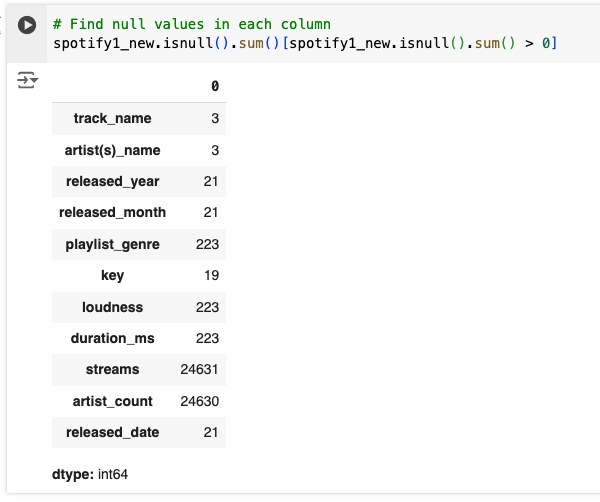

In [ ]:
# drop unnescessary columns
spotify1_final = spotify1_final.drop(columns=['released_day','streams','artist_count','released_date'])

In [ ]:
spotify1_final.head()

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,0,2001.0,1.0,[rock],0.682,0.401,D,-10.068,1,0.0236,0.279000,0.011700,0.0887,0.566,97,235440.0
1,008MceT31RotUANsKuzy3L,Liquid Blue,The.madpix.project,0,2015.0,8.0,[pop],0.659,0.794,A♯/B♭,-5.644,0,0.0540,0.000761,0.132000,0.3220,0.852,128,228565.0
2,008rk8F6ZxspZT4bUlkIQG,Fever,YOSA & TAAR,0,2018.0,11.0,[pop],0.662,0.838,C♯/D♭,-6.300,1,0.0499,0.114000,0.000697,0.0881,0.496,129,236308.0
3,00EPIEnX1JFjff8sC6bccd,No Me Acuerdo,Thalía,0,2018.0,6.0,[latin],0.836,0.799,G,-4.247,0,0.0873,0.187000,0.000000,0.0920,0.772,94,217653.0
4,00FR9VQ0uzF4NNxVKKiMz2,Full Of Smoke,Christión,0,1997.0,1.0,[r&b],0.389,0.616,C♯/D♭,-8.747,0,0.2840,0.453000,0.000000,0.9160,0.716,145,289227.0


In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [ ]:
spotify1_final[['popular', 'released_year', 'released_month', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']].corr().loc['popular'].sort_values(ascending=False)

,popular
popular,1.000000
loudness,0.066213
acousticness,0.044246
danceability,0.037827
valence,0.037137
released_month,0.029422
mode,0.022765
tempo,0.006149
speechiness,-0.006101
released_year,-0.010682


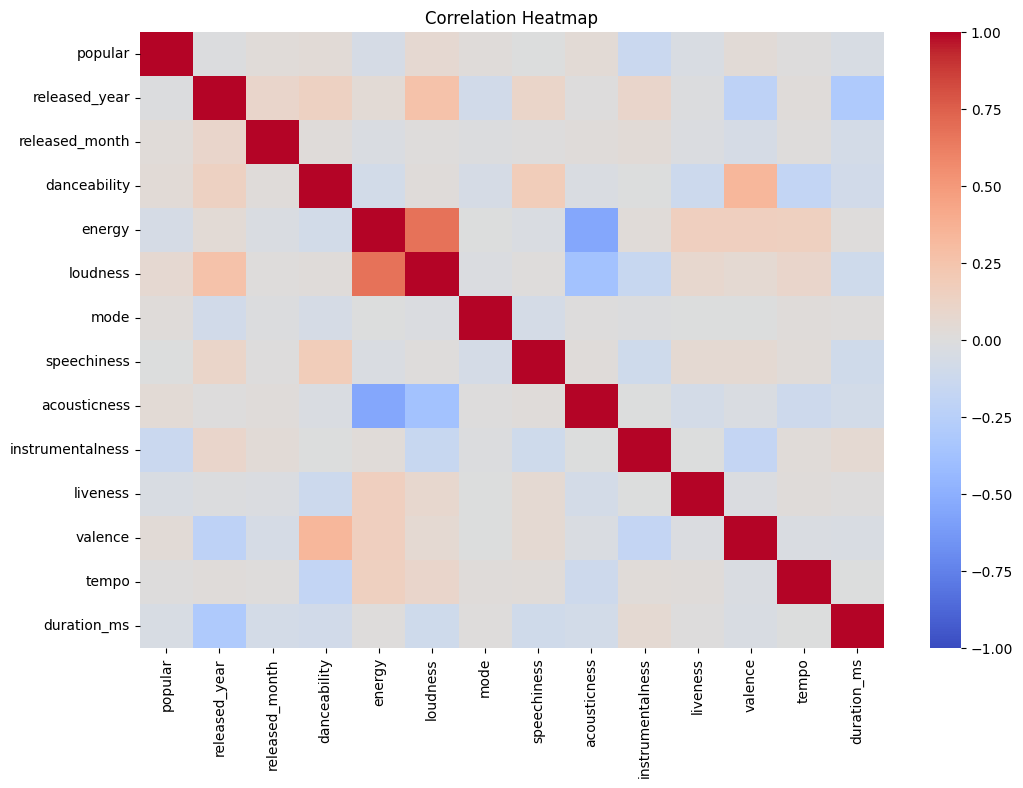

In [ ]:
# Compute the correlation matrix
correlation_matrix = spotify1_final[['popular', 'released_year', 'released_month', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cor_matrix = spotify1_final[['popular', 'released_year', 'released_month', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']].corr()
cor_matrix

,popular,released_year,released_month,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
popular,1.000000,-0.010682,0.029422,0.037827,-0.058971,0.066213,0.022765,-0.006101,0.044246,-0.135275,-0.033558,0.037137,0.006149,-0.046182
released_year,-0.010682,1.000000,0.099938,0.146150,0.041306,0.262489,-0.088215,0.107038,0.004366,0.097307,-0.013555,-0.215604,0.018940,-0.300193
released_month,0.029422,0.099938,1.000000,0.018145,-0.026970,0.010438,-0.010644,0.000340,0.021409,0.035224,-0.021725,-0.057393,0.012241,-0.075351
danceability,0.037827,0.146150,0.018145,1.000000,-0.079030,0.015870,-0.055128,0.186797,-0.029719,-0.003555,-0.124233,0.336122,-0.187028,-0.088798
energy,-0.058971,0.041306,-0.026970,-0.079030,1.000000,0.678475,-0.005371,-0.027910,-0.547044,0.026228,0.161882,0.156742,0.149517,0.013732
loudness,0.066213,0.262489,0.010438,0.015870,0.678475,1.000000,-0.017068,0.015144,-0.371036,-0.152732,0.083284,0.055082,0.097107,-0.106301
mode,0.022765,-0.088215,-0.010644,-0.055128,-0.005371,-0.017068,1.000000,-0.066760,0.006226,-0.007867,-0.003658,-0.004327,0.019986,0.012379
speechiness,-0.006101,0.107038,0.000340,0.186797,-0.027910,0.015144,-0.066760,1.000000,0.023031,-0.104778,0.060636,0.062373,0.029277,-0.096188
acousticness,0.044246,0.004366,0.021409,-0.029719,-0.547044,-0.371036,0.006226,0.023031,1.000000,-0.003338,-0.074281,-0.024682,-0.112619,-0.085344
instrumentalness,-0.135275,0.097307,0.035224,-0.003555,0.026228,-0.152732,-0.007867,-0.104778,-0.003338,1.000000,-0.006064,-0.174731,0.023606,0.060924


In [ ]:
threshold = 0.3
high_corr_pairs = correlation_matrix.stack()  # Convert to long format
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs) > threshold]  # Filter by threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Remove self-correlations

# Display the results
high_corr_pairs = high_corr_pairs.reset_index()
high_corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlation']
high_corr_pairs['Ordered_Pair'] = high_corr_pairs.apply(lambda x: tuple(sorted([x['Variable_1'], x['Variable_2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset='Ordered_Pair').drop(columns='Ordered_Pair')

# Sort the results
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

print(high_corr_pairs)

      Variable_1    Variable_2  Correlation
2         energy      loudness     0.678475
1   danceability       valence     0.336122
0  released_year   duration_ms    -0.300193
5       loudness  acousticness    -0.371036
3         energy  acousticness    -0.547044


In [ ]:
# prompt: find the count and the corresponding ratio of the total of "popular" in spotify1_final, represent in a table

import pandas as pd

# Assuming spotify1_final is already loaded as a pandas DataFrame

# Calculate the count of 'popular' values
popular_counts = spotify1_final['popular'].value_counts()

# Calculate the ratio of each 'popular' value to the total count
popular_ratios = popular_counts / len(spotify1_final)

# Create a DataFrame for the results
result_df = pd.DataFrame({'Count': popular_counts, 'Ratio': popular_ratios})

# Display the table
result_df

,Count,Ratio
popular,,
0,19335,0.829615
1,3971,0.170385


In [ ]:
spotify1_final[['popular']].value_counts()

,count
popular,
0,19335
1,3971


#### Hidden subset (K-mean Clustering)

Our dataset categorizes songs into six traditional genres or combinations of genres. However, with the evolution of the music industry, these conventional genre labels may no longer accurately represent the characteristics of modern music. For instance, many contemporary songs blend multiple genres, such as pop and rap or R&B and rap. As a result, we aim to explore alternative methods for classifying songs by uncovering hidden patterns or subsets within the data using k-means clustering.

##### Validate our hypothesis

In [ ]:
# create a "number_of_genres" column
number_of_genres = []
for i in spotify1_final['playlist_genre']:
    number_of_genres.append(len(i))
spotify1_final['number_of_genres'] = number_of_genres

In [ ]:
# prompt: group rows by 'number_of_genres' in spotify1_final, find the average "released_year" and "popular" of different group (0 decimal place for released_year, 3 decimal places for "popular"), the corresponding value_counts, print as a table, sort values by the "number_of_genres" in descending order

import pandas as pd

# Group by 'number_of_genres', calculate average 'released_year' and 'popular'
grouped = spotify1_final.groupby('number_of_genres').agg(
    avg_released_year=('released_year', 'mean'),
    avg_popular=('popular', 'mean'),
    value_counts=('number_of_genres', 'count')
)

# Format the results
grouped['avg_released_year'] = grouped['avg_released_year'].astype(int)
grouped['avg_popular'] = grouped['avg_popular'].round(3)

# Sort by 'number_of_genres' in descending order
grouped = grouped.sort_values('number_of_genres', ascending=False)

# Display the table
grouped

,avg_released_year,avg_popular,value_counts
number_of_genres,,,
5,2018,1.000,3
4,2018,0.957,46
3,2015,0.813,134
2,2013,0.575,1028
1,2010,0.146,22095


##### K-mean clustering 1: using Danceability, Loudness and Tempo

For n_clusters = 2, the average silhouette_score is : 0.2638760840458516
For n_clusters = 3, the average silhouette_score is : 0.2743163687436014
For n_clusters = 4, the average silhouette_score is : 0.2643831766055001
For n_clusters = 5, the average silhouette_score is : 0.23668378779470856
For n_clusters = 6, the average silhouette_score is : 0.24326734648569726
For n_clusters = 7, the average silhouette_score is : 0.24262307305472747
For n_clusters = 8, the average silhouette_score is : 0.24392627222936958


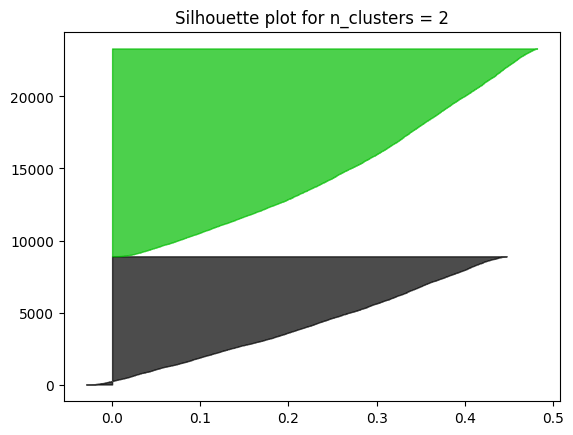

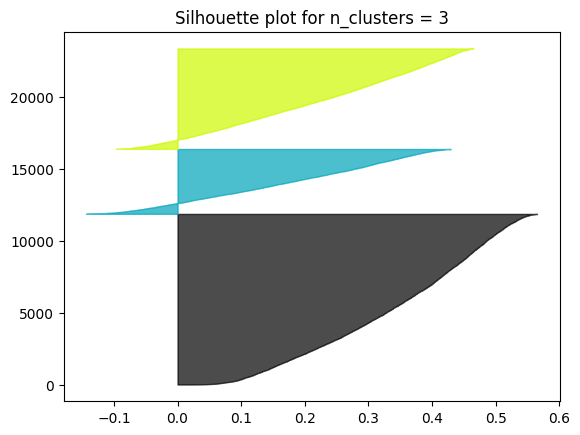

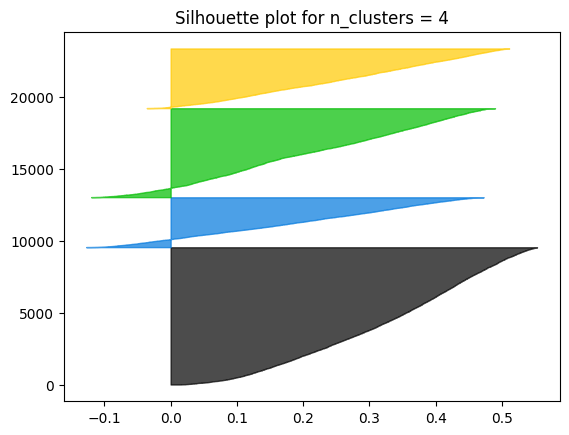

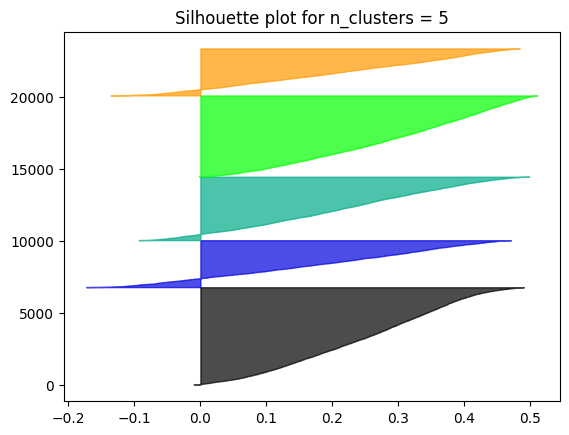

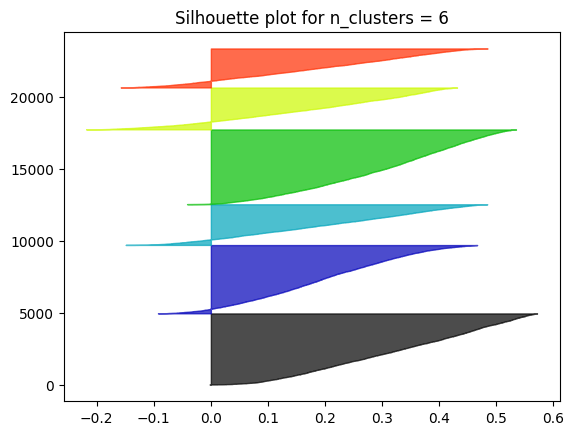

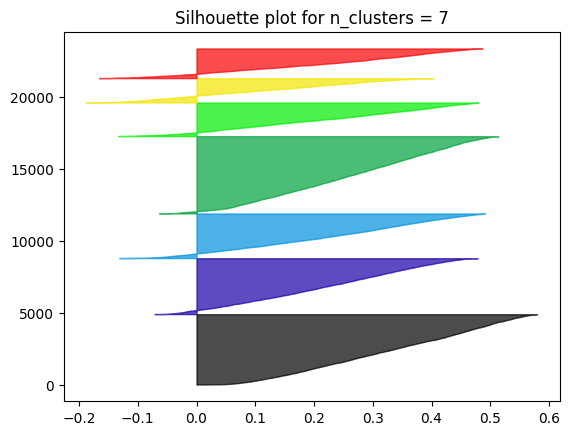

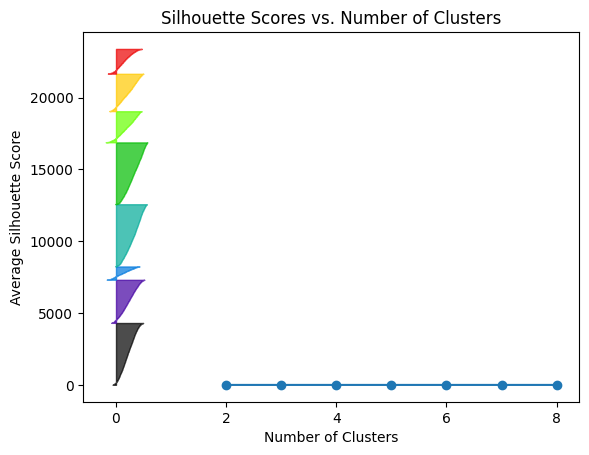

In [ ]:
# prompt: use danceability, loudness, tempo columns in spotify1_final data to perform k-mean clustering with seed 528, standardize all the variables, make a copy of the data and save cluster label to the copy of data. plot the silhouette plot to help determine the best number of clusters

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

# Assuming spotify1_final is already loaded and preprocessed as in the provided code

# Select the relevant columns for clustering
X = spotify1_final[['danceability', 'loudness', 'tempo']]

# Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a copy of the data
spotify1_final_copy = spotify1_final.copy()

# Determine the optimal number of clusters using silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=528)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    # Print silhouette score for each cluster
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Plot silhouette scores
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    plt.figure()
    plt.title(f"Silhouette plot for n_clusters = {n_clusters}")
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10  # 10 for the 0 samples

# Plot the average Silhouette Scores
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.show()

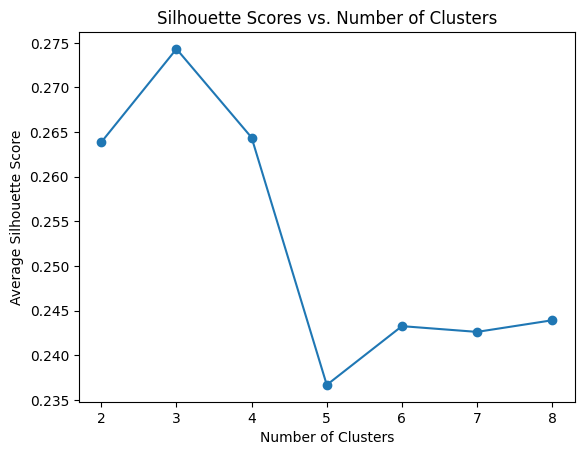

In [ ]:
# Plot the average Silhouette Scores
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.show()

In [ ]:
# Select the best number of clusters based on the silhouette plot (e.g., n_clusters = 3)

best_n_clusters = 3  # Replace with the observed best number of clusters

kmeans = KMeans(n_clusters=best_n_clusters, random_state=528)
cluster_labels = kmeans.fit_predict(X_scaled)

# Save cluster labels to the copy of the data
spotify1_final_copy['cluster_label'] = cluster_labels

# Now you have the cluster labels in spotify1_final_copy
spotify1_final_copy.head()

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,number_of_genres,cluster_label
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,0,2001.0,1.0,[rock],0.682,0.401,D,...,1,0.0236,0.279000,0.011700,0.0887,0.566,97,235440.0,1,1
1,008MceT31RotUANsKuzy3L,Liquid Blue,The.madpix.project,0,2015.0,8.0,[pop],0.659,0.794,A♯/B♭,...,0,0.0540,0.000761,0.132000,0.3220,0.852,128,228565.0,1,0
2,008rk8F6ZxspZT4bUlkIQG,Fever,YOSA & TAAR,0,2018.0,11.0,[pop],0.662,0.838,C♯/D♭,...,1,0.0499,0.114000,0.000697,0.0881,0.496,129,236308.0,1,0
3,00EPIEnX1JFjff8sC6bccd,No Me Acuerdo,Thalía,0,2018.0,6.0,[latin],0.836,0.799,G,...,0,0.0873,0.187000,0.000000,0.0920,0.772,94,217653.0,1,0
4,00FR9VQ0uzF4NNxVKKiMz2,Full Of Smoke,Christión,0,1997.0,1.0,[r&b],0.389,0.616,C♯/D♭,...,0,0.2840,0.453000,0.000000,0.9160,0.716,145,289227.0,1,2


In [ ]:
# prompt: group spotify1_final_copy data by cluster_label and show the average of all the numerical columns, sort rows by popular, in descending order

# Group data by cluster_label and calculate the average of numerical columns
grouped_data = spotify1_final_copy.groupby('cluster_label').agg({
    'popular': 'mean',
    'released_year': 'mean',
    'released_month': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': 'mean',
    'number_of_genres': 'mean'
}).sort_values(by='popular', ascending=False)

# Display the grouped and sorted data
grouped_data

,popular,released_year,released_month,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,number_of_genres
cluster_label,,,,,,,,,,,,,,,
0,0.191385,2012.753885,6.510389,0.729544,0.729830,-5.738524,0.552365,0.111266,0.150963,0.071668,0.185550,0.552229,109.603041,221663.443355,1.074662
2,0.169895,2010.442818,6.436361,0.535211,0.762836,-5.725502,0.575979,0.106270,0.134944,0.078123,0.212935,0.455779,146.348113,227951.658838,1.057971
1,0.115855,2005.761174,6.351790,0.636084,0.510494,-11.375398,0.579275,0.098460,0.313955,0.153584,0.175105,0.479612,108.979097,237870.362298,1.035135


In [ ]:
import pandas as pd

# Initialize an empty DataFrame to store the results
cluster_genre_counts = pd.DataFrame()

# Iterate over each cluster
clusters = [0, 1, 2]
for cluster in clusters:
    # Filter rows for the current cluster
    cluster_data = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]

    # Flatten the genre lists into a single list
    flattened_genres = cluster_data['playlist_genre'].explode()

    # Count occurrences of each genre
    genre_counts = flattened_genres.value_counts()

    # Add the counts to the DataFrame
    cluster_genre_counts[f'Cluster_{cluster}'] = genre_counts

# Replace NaN with 0 and convert to integers
cluster_genre_counts = cluster_genre_counts.fillna(0).astype(int)

# Display the resulting DataFrame
print(cluster_genre_counts)


                Cluster_0  Cluster_1  Cluster_2
playlist_genre                                 
rap                  2517        835       1113
latin                2506        518        765
edm                  2452        393       1614
pop                  2290        612       1250
r&b                  2089       1224        818
rock                  808       1071       1755
Unknown                62          2         58


In [ ]:
spotify1_final_copy.groupby('cluster_label').size()

,0
cluster_label,
0,11840
1,4497
2,6969


In [ ]:
for cluster in range(3):  # Iterate through clusters 0 to 2
    print(f"Cluster {cluster}:")
    cluster_tracks = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]['track_name'].head(5)
    for track in cluster_tracks:
      print(track)
    print("-" * 20) # Separator between clusters

Cluster 0:
Liquid Blue
Fever
No Me Acuerdo
Tender Lover
Ti volevo dedicare (feat. J-AX & Boomdabash)
--------------------
Cluster 1:
Pangarap
Satisfy You
Limestone
Get The Funk Out Ma Face
Ain't No Future In Yo' Frontin'
--------------------
Cluster 2:
Full Of Smoke
Hide Away (feat. Envy Monroe)
We Own It (Fast & Furious)
It Won't Stop (feat. Chris Brown) - Julian Calor Remix
Give You Everything
--------------------


##### K-mean clustering 2: using Energy and Valence

Inspiration: https://www.researchgate.net/figure/Emotional-classification-of-music-by-energy-and-valence-parameters-with-exemplary-songs_fig2_334084112


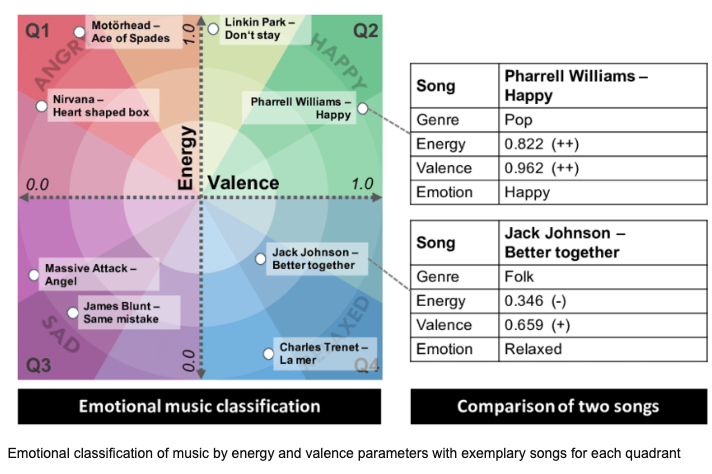

1. Energy
Definition: Energy refers to the intensity and activity level of the music.
Characteristics:
High-energy music feels fast, loud, dynamic, or intense. It often includes powerful rhythms, driving beats, or energetic melodies.
Example: Dance tracks, rock anthems, or fast-paced electronic music.
Low-energy music feels calm, soft, slow, or mellow. It often involves gentle rhythms or soothing melodies.
Example: Ambient music, ballads, or acoustic tracks.
Associated Emotions: High energy correlates with feelings of excitement or stimulation, while low energy evokes relaxation or tranquility.
2. Valence
Definition: Valence refers to the emotional positivity or negativity conveyed by the music.
Characteristics:
High-valence music is happy, joyful, or uplifting. It has bright harmonies, major keys, and cheerful melodies.
Example: Pop songs with upbeat lyrics and melodies.
Low-valence music is sad, melancholic, or somber. It often uses minor keys, slower tempos, or darker tonalities.
Example: Sad ballads, somber classical pieces, or emotionally heavy soundtracks.
Associated Emotions: High valence aligns with happiness and positivity, while low valence is linked to sadness or melancholy.

Relationship Between Energy and Valence\
Music can combine energy and valence in different ways:\
High Energy + High Valence: Exciting and happy (e.g., an upbeat dance track).\
High Energy + Low Valence: Intense but negative (e.g., an aggressive or angry rock song).\
Low Energy + High Valence: Calm and happy (e.g., a soothing lullaby).\
Low Energy + Low Valence: Calm and sad (e.g., a reflective, slow ballad).

In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres'],
      dtype='object')

For n_clusters = 2, the average silhouette_score is : 0.3573629893628951


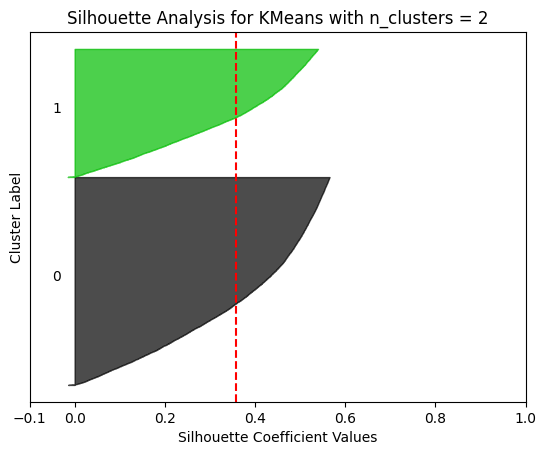

For n_clusters = 3, the average silhouette_score is : 0.38666579853960886


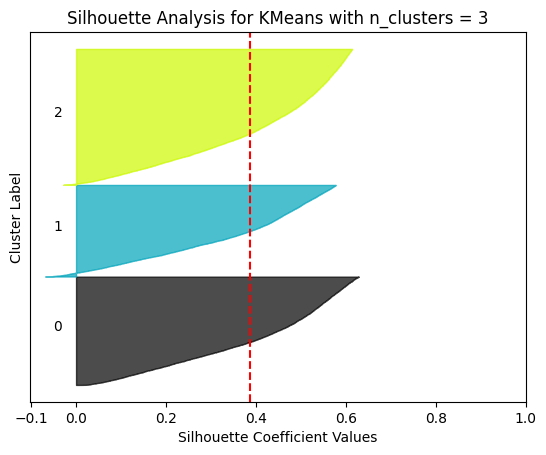

For n_clusters = 4, the average silhouette_score is : 0.36506514265894846


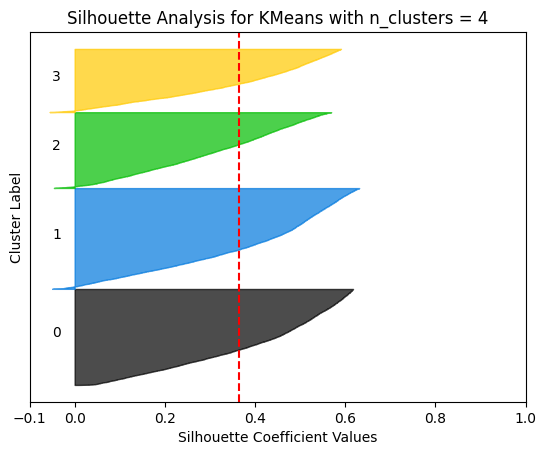

For n_clusters = 5, the average silhouette_score is : 0.3351571715158209


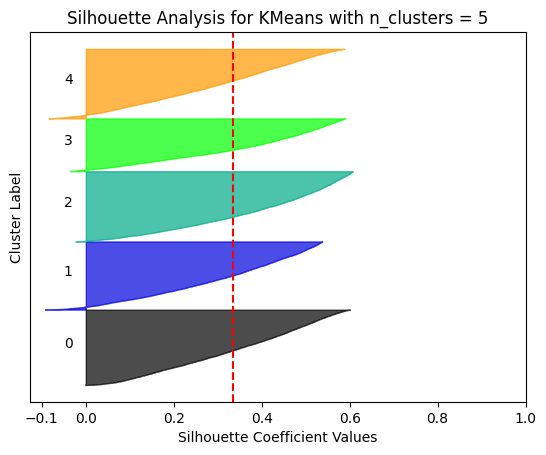

For n_clusters = 6, the average silhouette_score is : 0.34292901603356785


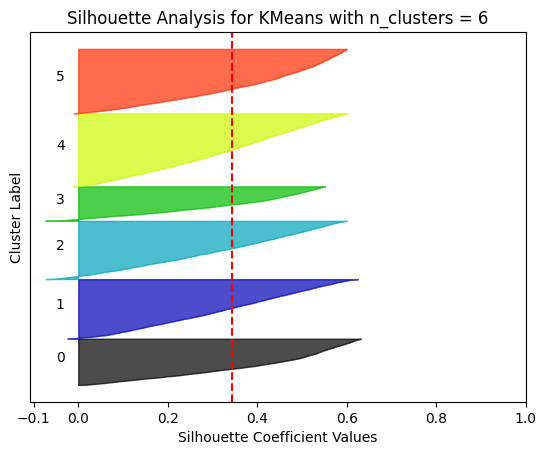

In [ ]:
# prompt: use "energy" and "valence" columns in spotify1_final data to perform k-mean clustering with seed 528, standardize all the variables, make a copy of the data and save cluster label to the copy of data. plot the silhouette plot to help determine the best number of clusters

# Create a copy of the data
spotify1_final_copy = spotify1_final.copy()

# Select features for clustering
features = ['energy', 'valence']
X = spotify1_final[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the silhouette method
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=528)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    plt.figure()
    plt.title(f"Silhouette Analysis for KMeans with n_clusters = {n_clusters}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [ ]:
# Based on the silhouette plots, choose the optimal number of clusters (e.g., n_clusters = optimal_k)
optimal_k = 3 # Example, replace with your chosen optimal k from the plots


# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=528)
spotify1_final_copy['cluster_label'] = kmeans.fit_predict(X_scaled)


#Print the first 5 rows of the dataframe to verify
spotify1_final_copy.head()

,track_id,track_name,artist(s)_name,popular,released_year,released_month,playlist_genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,number_of_genres,cluster_label
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,0,2001.0,1.0,[rock],0.682,0.401,D,...,1,0.0236,0.279000,0.011700,0.0887,0.566,97,235440.0,1,1
1,008MceT31RotUANsKuzy3L,Liquid Blue,The.madpix.project,0,2015.0,8.0,[pop],0.659,0.794,A♯/B♭,...,0,0.0540,0.000761,0.132000,0.3220,0.852,128,228565.0,1,2
2,008rk8F6ZxspZT4bUlkIQG,Fever,YOSA & TAAR,0,2018.0,11.0,[pop],0.662,0.838,C♯/D♭,...,1,0.0499,0.114000,0.000697,0.0881,0.496,129,236308.0,1,0
3,00EPIEnX1JFjff8sC6bccd,No Me Acuerdo,Thalía,0,2018.0,6.0,[latin],0.836,0.799,G,...,0,0.0873,0.187000,0.000000,0.0920,0.772,94,217653.0,1,2
4,00FR9VQ0uzF4NNxVKKiMz2,Full Of Smoke,Christión,0,1997.0,1.0,[r&b],0.389,0.616,C♯/D♭,...,0,0.2840,0.453000,0.000000,0.9160,0.716,145,289227.0,1,2


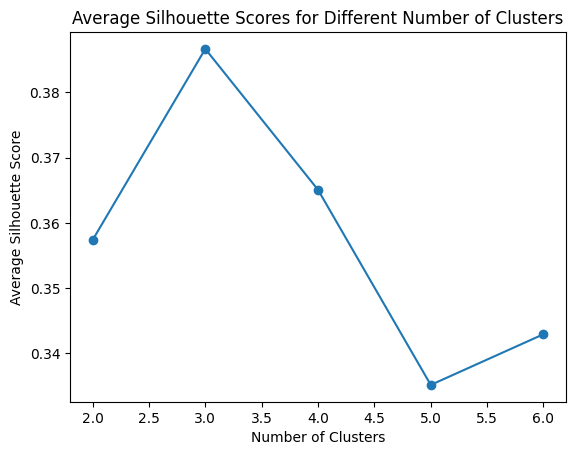

In [ ]:
# prompt: Plot the average Silhouette Scores

import matplotlib.pyplot as plt

# Assuming silhouette_avg_scores and range_n_clusters are defined from the previous code

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Average Silhouette Scores for Different Number of Clusters")
plt.show()

In [ ]:
# prompt: use "energy" and "valence" columns in spotify1_final data to perform k-mean clustering (k = 4) with seed 528, standardize all the variables, make a copy of the data and save cluster label to the copy of data.

# Apply KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=528)
spotify1_final_copy['cluster_label'] = kmeans.fit_predict(X_scaled)

# check the unique cluster_label
spotify1_final_copy['cluster_label'].unique()

array([2, 0, 1, 3], dtype=int32)

In [ ]:
# prompt: group spotify1_final_copy data by cluster_label and show the average of all the numerical columns, sort rows by popular, in descending order

# Group data by cluster_label and calculate the average of numerical columns
grouped_data = spotify1_final_copy.groupby('cluster_label').agg({
    'popular': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'acousticness': 'mean',
    'danceability': 'mean',
    'duration_ms': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'tempo': 'mean',
    'released_year': 'mean'
}).sort_values('popular', ascending=False)

grouped_data

,popular,energy,valence,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,released_year
cluster_label,,,,,,,,,,,,,
3,0.198632,0.448992,0.293335,0.349213,0.623845,226191.626601,0.108817,0.161865,-9.471598,0.581756,0.101773,116.559179,2011.748461
2,0.189888,0.580975,0.657042,0.230717,0.713800,227106.478093,0.051325,0.170368,-8.103863,0.550846,0.125938,116.905721,2008.700057
0,0.179322,0.828293,0.731788,0.121729,0.683088,224229.354226,0.060133,0.202165,-5.598564,0.570828,0.105254,121.705282,2008.805672
1,0.129503,0.815894,0.321888,0.083387,0.598226,228969.613860,0.133755,0.216551,-5.363652,0.558319,0.098702,124.425672,2013.396369


In [ ]:
import pandas as pd

# Initialize an empty DataFrame to store the results
cluster_genre_counts = pd.DataFrame()

# Iterate over each cluster
clusters = [0, 1, 2, 3]
for cluster in clusters:
    # Filter rows for the current cluster
    cluster_data = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]

    # Flatten the genre lists into a single list
    flattened_genres = cluster_data['playlist_genre'].explode()

    # Count occurrences of each genre
    genre_counts = flattened_genres.value_counts()

    # Add the counts to the DataFrame
    cluster_genre_counts[f'Cluster_{cluster}'] = genre_counts

# Replace NaN with 0 and convert to integers
cluster_genre_counts = cluster_genre_counts.fillna(0).astype(int)

# Display the resulting DataFrame
print(cluster_genre_counts)

                Cluster_0  Cluster_1  Cluster_2  Cluster_3
playlist_genre                                            
latin                1578        738        963        510
pop                  1261       1292        819        780
rock                 1231       1173        681        549
rap                  1056       1014       1310       1085
edm                  1013       2669        407        370
r&b                   886        497       1427       1321
Unknown                21         26         30         45


In [ ]:
# prompt: count the number of row in each cluster

spotify1_final_copy.groupby('cluster_label').size()

,0
cluster_label,
0,6664
1,6996
2,5261
3,4385


In [ ]:
# prompt: show 5 track_name in each cluster

# Assuming spotify1_final_copy DataFrame is already created and populated as in the provided code.

for cluster in range(4):  # Iterate through clusters 0 to 3
    print(f"Cluster {cluster}:")
    cluster_tracks = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]['track_name'].head(5)
    for track in cluster_tracks:
      print(track)
    print("-" * 20) # Separator between clusters

Cluster 0:
Liquid Blue
No Me Acuerdo
Tender Lover
Let Me Entertain You - Remastered 2011
Latina (feat. Maluma)
--------------------
Cluster 1:
Fever
Hide Away (feat. Envy Monroe)
Ti volevo dedicare (feat. J-AX & Boomdabash)
It Won't Stop (feat. Chris Brown) - Julian Calor Remix
Give You Everything
--------------------
Cluster 2:
Pangarap
Full Of Smoke
Satisfy You
Limestone
Brut Riddim - 120 bpm
--------------------
Cluster 3:
Thousand Lakes
Shine - Kygo Remix
Baby It's Cold Outside (feat. Christina Aguilera)
Stop Lying
Me Enamoré
--------------------


In [ ]:
cluster0 = spotify1_final_copy[spotify1_final_copy['cluster_label'] == 0]
cluster1 = spotify1_final_copy[spotify1_final_copy['cluster_label'] == 1]
cluster2 = spotify1_final_copy[spotify1_final_copy['cluster_label'] == 2]
cluster3 = spotify1_final_copy[spotify1_final_copy['cluster_label'] == 3]

In [ ]:
# prompt: output cluster0, cluster1, cluster2, cluster3 as csv

cluster0.to_csv('cluster0.csv', index=False)
cluster1.to_csv('cluster1.csv', index=False)
cluster2.to_csv('cluster2.csv', index=False)
cluster3.to_csv('cluster3.csv', index=False)

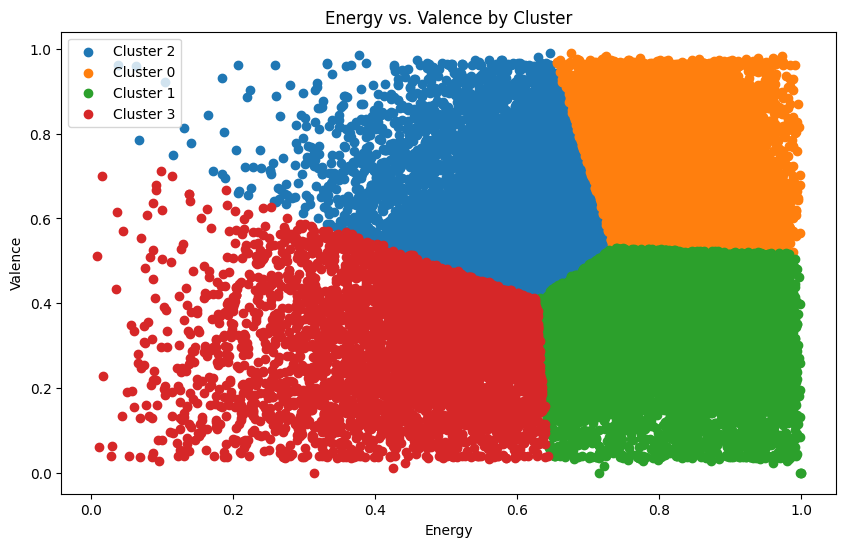

In [ ]:
# prompt: plot a scatter plot with energy as x-axis and valence as y-axis, use different colors to represent different cluster_label in the spotify1_final_copy data.

# Assuming spotify1_final_copy DataFrame is already created and populated as in the provided code.

plt.figure(figsize=(10, 6))
for cluster in spotify1_final_copy['cluster_label'].unique():
    cluster_data = spotify1_final_copy[spotify1_final_copy['cluster_label'] == cluster]
    plt.scatter(cluster_data['energy'], cluster_data['valence'], label=f'Cluster {cluster}')

plt.xlabel('Energy')
plt.ylabel('Valence')
plt.title('Energy vs. Valence by Cluster')
plt.legend()
plt.show()

Since 1. Silhouette Scores of the k-mean clusters using the feature set['energy', 'valence'] are better than the feature set ['Danceability', 'Loudness', 'Tempo'] and 2. we have a better understanding of each cluster represent, we think k-mean clustering (k=4) using energy and valence would be an useful variable for our analysis and should be added to our data.

**Brief Conclusion**: newer, more calm, more quiet, softer, somber, sadder songs tend to be more popular
1. **Cluster 0**: low energy and high valence, most r&b and rap, older songs, the second most popular
    * popular song example
    * Sunflower - Spider-Man: Into the Spider-Verse - Post Malone
        * energy: 0.522 valence: 0.925
    * What Do You Mean? - Justin Bieber
        * energy: 0.567 valence: 0.793
2. **Cluster 1**: high energy and low valence, most edm, newer songs, least popular
    * All Falls Down (feat. Juliander) - Alan Walker
        * energy: 0.754 valence: 0.28
    * Mistaken
        * energy: 0.694 valence: 0.08
    * Clarity - Zedd
        * energy: 0.781 valence: 0.176
3. **Cluster 2**: high energy and high valence, more latin, older songs, the third most popular
    * Happy - From "Despicable Me 2"
        * energy: 0.822 valence: 0.962
    * Summer - Calvin Harris
        * energy: 0.856 valence: 0.743
    * Shake it Off - Taylor Swift
        * energy: 0.8 valence: 0.95
4. **Cluster 3**: lower energy and low valence, more r&b and rap, newer songs, the most popular
    * Goodbye - Billie Eilish
        * energy: 0.138 valence: 0.0503
    * Jaded - Drake
        * energy: 0.271 valence: 0.0371
    * All of me - John Legend
        * energy: 0.264 valence: 0.331

In [ ]:
spotify1_final_copy['cluster_label'].unique()

array([2, 0, 1, 3], dtype=int32)

### **Modeling**


In [ ]:
# add cluster_label to the spotify1_final data
spotify1_final = spotify1_final_copy

#### Train-test Split

In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres',
       'cluster_label'],
      dtype='object')

In [ ]:
spotify1_final.shape

(23306, 21)

In [ ]:
# Convert playlist_genre column into dummy variables

# Step 1: Explode the 'playlist_genre' column into separate rows
exploded_df = spotify1_final.explode('playlist_genre')

# Step 2: Create dummy variables for each genre (after exploding)
dummies = pd.get_dummies(exploded_df['playlist_genre'], prefix='genre', drop_first=False)

# Step 3: Drop the "Unknown" category (if needed)
if 'genre_Unknown' in dummies.columns:
    dummies = dummies.drop(columns=['genre_Unknown'])

# Step 4: Add the dummy variables back to the DataFrame
# Group by the index to sum the dummy columns for each row (this reconstructs the original shape)
spotify1_final = pd.concat([spotify1_final, dummies.groupby(exploded_df.index).sum()], axis=1)

In [ ]:
# prompt: Convert 'cluster_label' column into dummy variables (numerical)

# Convert 'cluster_label' column into dummy variables
cluster_dummies = pd.get_dummies(spotify1_final['cluster_label'], prefix='cluster', drop_first=True)
spotify1_final = pd.concat([spotify1_final, cluster_dummies], axis=1)

In [ ]:
spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']] = spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']].astype(int)
spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']] = spotify1_final[['cluster_1', 'cluster_2', 'cluster_3']].astype(int)

In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres',
       'cluster_label', 'genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b',
       'genre_rap', 'genre_rock', 'cluster_1', 'cluster_2', 'cluster_3'],
      dtype='object')

In [ ]:
# after adding all the dummy variables (['edm', 'rock', 'r&b', 'rap', 'latin', 'pop', 'Unknown']) (without Unknown)
# and cluster_label dummy variables (no cluster 0)
spotify1_final.shape

(23306, 30)

In [ ]:
# prompt: split the spotify1_final data to 70% train and 30% test, set seed to 528, y be "popular" and stratify it to make sure similar proportion of 1 and 0 in both training and testing set. the rest of the columns as x. print the shape of the train and test data

from sklearn.model_selection import train_test_split
import pandas as pd

# Define features (X) and target (y)
X = spotify1_final.drop('popular', axis=1)
y = spotify1_final['popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16314, 29)
Shape of X_test: (6992, 29)
Shape of y_train: (16314,)
Shape of y_test: (6992,)


#### Logistic Regression

##### Base model


In [ ]:
spotify1_final.columns

Index(['track_id', 'track_name', 'artist(s)_name', 'popular', 'released_year',
       'released_month', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres',
       'cluster_label', 'genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b',
       'genre_rap', 'genre_rock', 'cluster_1', 'cluster_2', 'cluster_3'],
      dtype='object')

In [ ]:
spotify1_final.dtypes

,0
track_id,object
track_name,object
artist(s)_name,object
popular,int64
released_year,float64
released_month,float64
playlist_genre,object
danceability,float64
energy,float64
key,object


In [ ]:
# prompt: use the training data to build a logistic regression model with all the numerical variable, y be "popular", print the summary of the model using statsmodel

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Select only numerical features for logistic regression
columns = ['released_year',
       'released_month', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres',
           'genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b',
       'genre_rap', 'genre_rock', 'cluster_1', 'cluster_2', 'cluster_3']
X_train_num = X_train[columns]
X_test_num = X_test[columns]

# Add a constant to the independent variables
X_train_num = sm.add_constant(X_train_num)
X_test_num = sm.add_constant(X_test_num)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_num)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Fit the logistic regression model using scikit-learn for ROC curve
logreg = LogisticRegression(random_state=528)  # Use the same random state
logreg.fit(X_train_num.drop('const', axis=1), y_train) # Remove the constant for sklearn

# Predict probabilities for the test set
y_pred_prob = logreg.predict_proba(X_test_num.drop('const', axis=1))[:, 1]

         Current function value: 0.386822
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                16314
Model:                          Logit   Df Residuals:                    16290
Method:                           MLE   Df Model:                           23
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.1527
Time:                        22:37:26   Log-Likelihood:                -6310.6
converged:                      False   LL-Null:                       -7447.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               18.7650      5.022      3.736      0.000       8.922      28.608
released_year       -0.0102      0.002     -4.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: In this classification problem (y = popular in spotify1_final), the expected revenue of True Positive is 150,000, False Positive is 20,000. No profit for True Negative and False Negative. The investment budget is 30000 per each investment. So the expected payoff is 120,000, False Positive is -10,000. calculate the expect total profit, with the best threshold. X_train, X_test, y_train, y_test are previously defined as train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)

import numpy as np

# Calculate the expected profit for each threshold
thresholds = np.linspace(0, 1, 101)  # Create 101 thresholds between 0 and 1
expected_profits = []

for threshold in thresholds:
    # Predict classes based on the current threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    tp = np.sum((y_test == 1) & (y_pred == 1))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fn = np.sum((y_test == 1) & (y_pred == 0))

    # Calculate the expected profit for the current threshold
    expected_profit = (tp * 120000) + (fp * -10000)
    expected_profits.append(expected_profit)

# Find the best threshold and its corresponding expected profit
best_threshold = thresholds[np.argmax(expected_profits)]
max_expected_profit = np.max(expected_profits)

print(f"Best Threshold: {best_threshold}")
print(f"Max Expected Total Profit: {max_expected_profit}")

Best Threshold: 0.01
Max Expected Total Profit: 84940000


##### 2nd Model
Manually remove features that are statistically insignificant one by one to find the optimal logistic regression model.

- Remove genre dummy variables

In [ ]:
# Select only numerical features for logistic regression
columns = ['released_year',
       'released_month', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'number_of_genres',
           'cluster_1', 'cluster_2', 'cluster_3']
X_train_num = X_train[columns]
X_test_num = X_test[columns]

# Add a constant to the independent variables
X_train_num = sm.add_constant(X_train_num)
X_test_num = sm.add_constant(X_test_num)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_num)
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.403680
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                16314
Model:                          Logit   Df Residuals:                    16296
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.1158
Time:                        22:37:27   Log-Likelihood:                -6585.6
converged:                       True   LL-Null:                       -7447.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.9755      4.387      7.289      0.000      23.377      40.574
released_ye

In [ ]:
# prompt: Predict probabilities for the test set and calculate the expected profit

# Fit the logistic regression model using scikit-learn for ROC curve
logreg = LogisticRegression(random_state=528)  # Use the same random state
logreg.fit(X_train_num.drop('const', axis=1), y_train) # Remove the constant for sklearn

# Predict probabilities for the test set
y_pred_prob = logreg.predict_proba(X_test_num.drop('const', axis=1))[:, 1]

# Calculate the expected profit for each threshold
thresholds = np.linspace(0, 1, 101)  # Create 101 thresholds between 0 and 1
expected_profits = []

for threshold in thresholds:
    # Predict classes based on the current threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    tp = np.sum((y_test == 1) & (y_pred == 1))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fn = np.sum((y_test == 1) & (y_pred == 0))

    # Calculate the expected profit for the current threshold
    expected_profit = (tp * 120000) + (fp * -10000)
    expected_profits.append(expected_profit)

# Find the best threshold and its corresponding expected profit
best_threshold = thresholds[np.argmax(expected_profits)]
max_expected_profit = np.max(expected_profits)

print(f"Best Threshold: {best_threshold}")
print(f"Max Expected Total Profit: {max_expected_profit}")

Best Threshold: 0.04
Max Expected Total Profit: 84940000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- remove other statistically insignificant variables (one variable at a time)
1. valence 2. released_year (you can't control it) 3. duration_ms 4. energy

In [ ]:
# Select only numerical features for logistic regression
columns = [
       'released_month', 'danceability',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'number_of_genres',
           'cluster_1', 'cluster_2', 'cluster_3']
X_train_num = X_train[columns]
X_test_num = X_test[columns]

# Add a constant to the independent variables
X_train_num = sm.add_constant(X_train_num)
X_test_num = sm.add_constant(X_test_num)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_num)
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.407688
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                popular   No. Observations:                16314
Model:                          Logit   Df Residuals:                    16300
Method:                           MLE   Df Model:                           13
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.1070
Time:                        22:37:28   Log-Likelihood:                -6651.0
converged:                       True   LL-Null:                       -7447.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.7704      0.211    -17.847      0.000      -4.184      -3.356
released_mo

In [ ]:
# prompt: Predict probabilities for the test set and calculate the expected profit

# Fit the logistic regression model using scikit-learn for ROC curve
logreg = LogisticRegression(random_state=528)  # Use the same random state
logreg.fit(X_train_num.drop('const', axis=1), y_train) # Remove the constant for sklearn

# Predict probabilities for the test set
y_pred_prob = logreg.predict_proba(X_test_num.drop('const', axis=1))[:, 1]

# Calculate the expected profit for each threshold
thresholds = np.linspace(0, 1, 101)  # Create 101 thresholds between 0 and 1
expected_profits = []

for threshold in thresholds:
    # Predict classes based on the current threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    tp = np.sum((y_test == 1) & (y_pred == 1))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fn = np.sum((y_test == 1) & (y_pred == 0))

    # Calculate the expected profit for the current threshold
    expected_profit = (tp * 120000) + (fp * -10000)
    expected_profits.append(expected_profit)

# Find the best threshold and its corresponding expected profit
best_threshold = thresholds[np.argmax(expected_profits)]
max_expected_profit = np.max(expected_profits)

print(f"Best Threshold: {best_threshold}")
print(f"Max Expected Total Profit: {max_expected_profit}")

Best Threshold: 0.08
Max Expected Total Profit: 89490000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


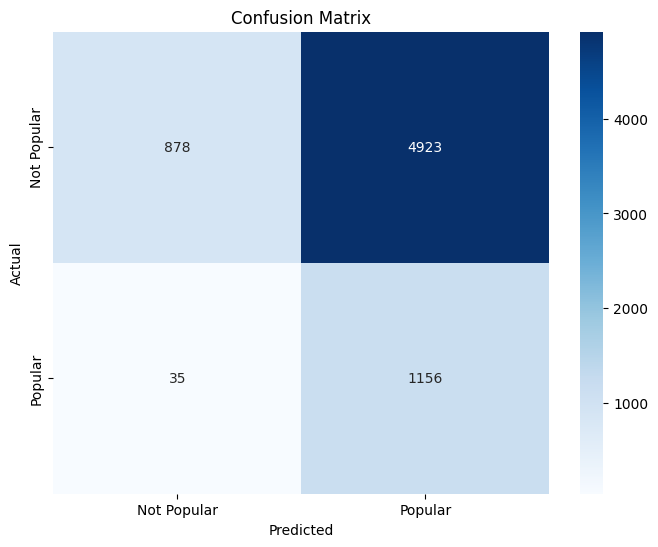

Recall: 0.9706129303106633
Precision: 0.1901628557328508


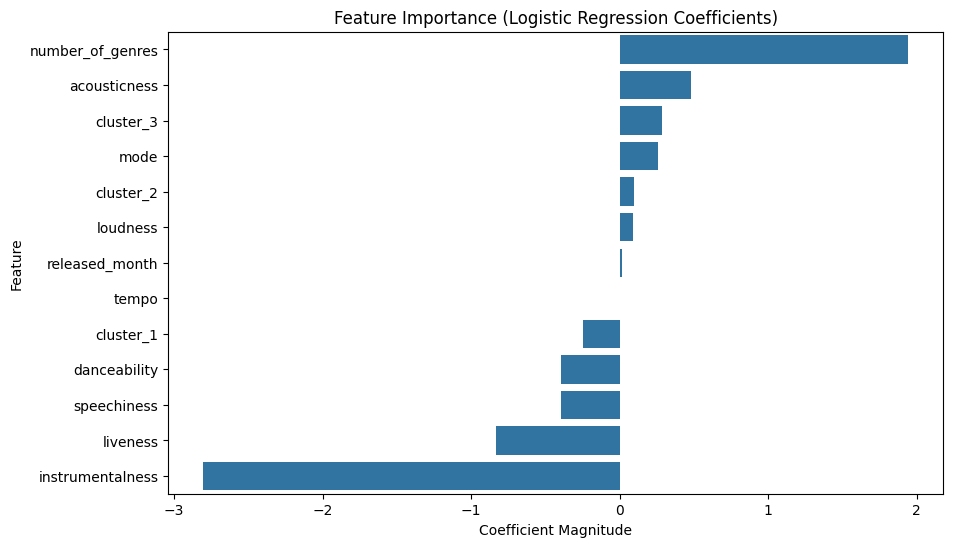

In [ ]:
# prompt: show the features importance and confusion with recall/ precision

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score

# Assuming logreg and X_test_num are defined from the previous code

# Predict the classes for the test set using the best threshold
y_pred = (y_pred_prob >= best_threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the recall and precision
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Feature Importance (for Logistic Regression)
feature_importance = pd.DataFrame({'Feature': X_train_num.drop('const', axis=1).columns, 'Coefficient': logreg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

### **Conclusion**

In [ ]:
# prompt: Use "energy" = 0.65 and "valence" = 0.55 in spotify2_final to categorize data into 4 groups.
# If rows that has "energy" > 0.65 and valence > 0.55, "h_energy_h_valence"
# If rows that has "energy" > 0.65 and valence <= 0.55, "h_energy_l_valence"
# If rows that has "energy" <= 0.65 and valence > 0.55, "l_energy_h_valence"
# If rows that has "energy" <= 0.65 and valence <= 0.55, "l_energy_l_valence"
# count the number of rows in each group

import pandas as pd

# Assuming your dataframe is named 'spotify2_final'
# Replace 'spotify2_final' with the actual name if different

# Create a copy to avoid modifying the original dataframe
spotify_categorized = spotify2_final.copy()

# Categorize data based on energy and valence
spotify_categorized['category'] = 'unknown'  # Initialize the new column
spotify_categorized.loc[(spotify_categorized['energy'] > 0.65) & (spotify_categorized['valence'] > 0.55), 'category'] = 'h_energy_h_valence'
spotify_categorized.loc[(spotify_categorized['energy'] > 0.65) & (spotify_categorized['valence'] <= 0.55), 'category'] = 'h_energy_l_valence'
spotify_categorized.loc[(spotify_categorized['energy'] <= 0.65) & (spotify_categorized['valence'] > 0.55), 'category'] = 'l_energy_h_valence'
spotify_categorized.loc[(spotify_categorized['energy'] <= 0.65) & (spotify_categorized['valence'] <= 0.55), 'category'] = 'l_energy_l_valence'

# Count the number of rows in each category
category_counts = spotify_categorized['category'].value_counts()
category_counts

,count
category,
l_energy_l_valence,234
h_energy_h_valence,220
h_energy_l_valence,158
l_energy_h_valence,118


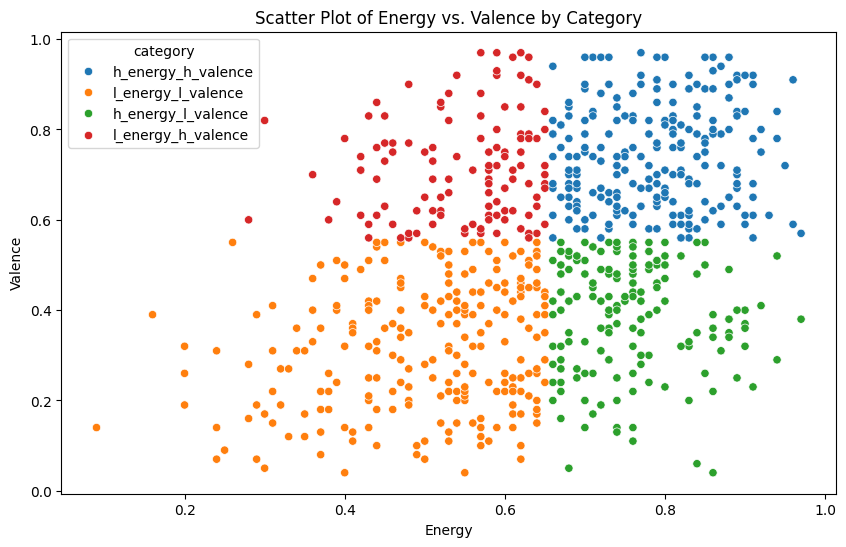

In [ ]:
# prompt: plot the scatterplot of category in spotify_categorized data, energy in x-axis and valence in y-axis

plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='valence', hue='category', data=spotify_categorized)
plt.title('Scatter Plot of Energy vs. Valence by Category')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.show()

In [ ]:
# prompt: Save /content/drive/MyDrive/DSO 528/DSO528 Final Project/DSO 528 Final Project Code.ipynb to html in /content/drive/MyDrive/DSO 528/DSO528 Final Project/DSO 528 Final Project Code.html

!jupyter nbconvert --to html /content/drive/MyDrive/DSO\ 528/DSO528\ Final\ Project/DSO\ 528\ Final\ Project\ Code.ipynb --output /content/drive/MyDrive/DSO\ 528/DSO528\ Final\ Project/DSO\ 528\ Final\ Project\ Code.html

[NbConvertApp] Converting notebook /content/drive/MyDrive/DSO 528/DSO528 Final Project/DSO 528 Final Project Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 2574189 bytes to /content/drive/MyDrive/DSO 528/DSO528 Final Project/DSO 528 Final Project Code.html
